## Diabetes prediction project:




## Objective: 
To apply different Machine learning algorithms that can predict whether or not a person has the disease diabetes, based on the attributes used as input to the model. 


## Context: 
We have a report where a group of people were studied and data on certain health indicators were stored. The following data are labeled, we have a variable that tells us whether respondents have diabetes, do not have diabetes or have pre-diabetes.

While there is no cure for diabetes, strategies such as losing weight, eating healthy, staying active and receiving medical treatments can mitigate the damage of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models of diabetes risk important tools for the public and public health officials.

## Explanation of the columns: 

Diabetes_012: has 3 classes, 0 is without diabetes or only during pregnancy, 1 is for prediabetes and 2 is for diabetes. 

blood_pressure: Patient with high blood pressure (0,1). 

cholesterol: Patient with high cholesterol (0,1). 

cholesterol_control: cholesterol control in the last five years (0.1).

BMI: Body mass index 

smoker: Have you smoked at least 100 cigarettes in your lifetime (0.1). 

Stroke: Patient who suffered a stroke (0,1) Infarction: Patient who suffered a heart attack (0,1) 

physical_activity: Adults who reported physical activity or exercise during the last 30 days in addition to their usual work (0,1) 

consume_fruit: Consume one fruit or more per day (0,1) 

consume_vegetable: Consume vegetables one or more times per day (0,1)

alcohol_consumption: Heavy drinkers (adult men who drink more than 14 drinks per week and adult women who drink more than 7 drinks per week) (0,1) 

social_work: Patient with social work (0,1) 

health_cost: Was there a time in the last 12 months when you needed to see a doctor but could not because of cost (0.1)?

health_ratio: Patient's overall health is: rate (1 ~ 5) 

mental_health_days: mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30) 

dias_physical_health: physical health, which includes physical illnesses and injuries, for how many days during the last 30 days was your physical health not good?

walking_difficulty: Do you have serious difficulties walking or climbing stairs (0,1)? 

Sex: respondent's sex (0,1) (Female or Male) 

Age: Fourteen-level age category (1 ~ 14) 

Education: Highest grade or year of school completed (1 ~ 6) 

Income: Annual household income from all sources (If respondent refuses at any income level, code "Refused") (1 ~ 8) (USD)

### Source: 
https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

## Import tools we need:

In [53]:
# Basic imports:
import pandas as pd
import numpy as np
import math

# Visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# # ML libraries:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.ensemble import GradientBoostingClassifier
# from imblearn.under_sampling import NearMiss
# import lightgbm as lgb

# # Metrics libraries:
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import classification_report
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from mlxtend.plotting import plot_confusion_matrix
# from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import f1_score
# from sklearn.metrics import roc_auc_score

# Other libraries:
import joblib
from scipy.stats import randint as sp_randint

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

## Carga del dataset y primer acercamiento a los datos 

In [54]:
data = pd.read_csv(
    r"C:\Users\andre\Desktop\Scripts\DATASETS\CSV\Diabetes Health Indicators Dataset\diabetes_012_health_indicators_BRFSS2015.csv")

In [55]:
data.shape

(253680, 22)

In [56]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [57]:
data.sample(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
215568,2.0,1.0,1.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,30.0,1.0,0.0,10.0,5.0,6.0
154914,0.0,0.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,13.0,6.0,7.0
40008,0.0,1.0,0.0,1.0,31.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,1.0,11.0,6.0,8.0
45142,0.0,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,12.0,6.0,6.0
12240,2.0,1.0,1.0,1.0,36.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,3.0,28.0,1.0,0.0,12.0,4.0,2.0


In [58]:
data.dtypes 

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

## Column data type transformation

In [59]:
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data['HighBP'] = data['HighBP'].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int) 
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [60]:
data.dtypes 

Diabetes_012            int32
HighBP                  int32
HighChol                int32
CholCheck               int32
BMI                     int32
Smoker                  int32
Stroke                  int32
HeartDiseaseorAttack    int32
PhysActivity            int32
Fruits                  int32
Veggies                 int32
HvyAlcoholConsump       int32
AnyHealthcare           int32
NoDocbcCost             int32
GenHlth                 int32
MentHlth                int32
PhysHlth                int32
DiffWalk                int32
Sex                     int32
Age                     int32
Education               int32
Income                  int32
dtype: object

## Null check:

In [61]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

## Check duplicate values:

In [62]:
data.duplicated().sum()

23899

In [63]:
# Now we delete duplicate values & check the result:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

print(f"The number of duplicate values is: {data.duplicated().sum()}. And the dataframe shape is: {data.shape}")

The number of duplicate values is: 0. And the dataframe shape is: (229781, 22)


## Rename the columns of the dataframe:

In [64]:
data.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8


Los casos de pre diabetes lo tomaremos como diabetes para englobar la clasificacion en diabetico o no diabetico 

In [65]:
data['Diabetes_012'].unique()

array([0, 2, 1])

In [68]:
data.Diabetes_012 = data.Diabetes_012.replace({2: 1})
data = data.rename(columns={'Diabetes_012':'Diabetes'})

In [69]:
data.head(2)

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1


In [72]:
# Copy the original dataframe to work with this:
data1 = data.copy()

## We modified the columns to improve data readability.

In [73]:
age_ranges = ['18-24', '25-29', '30-4', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-85', '+85']
for i, age_range in enumerate(age_ranges, start=1):
    data1.Age[data['Age'] == i] = age_range

In [74]:
data1.HighBP[data['HighBP'] == 0] = 'No'
data1.HighBP[data['HighBP'] == 1] = 'Yes'

In [75]:
data1.HighChol[data['HighChol'] == 0] = 'No'
data1.HighChol[data['HighChol'] == 1] = 'Yes'

In [76]:

data1.CholCheck[data['CholCheck'] == 0] = 'No'
data1.CholCheck[data['CholCheck'] == 1] = 'Yes'


In [77]:
data1.Smoker[data['Smoker'] == 0] = 'No'
data1.Smoker[data['Smoker'] == 1] = 'Yes'

In [78]:
data1.Stroke[data['Stroke'] == 0] = 'No'
data1.Stroke[data['Stroke'] == 1] = 'Yes'

In [79]:
data1.PhysActivity[data['PhysActivity'] == 0] = 'No'
data1.PhysActivity[data['PhysActivity'] == 1] = 'Yes'


In [80]:
data1.Fruits[data['Fruits'] == 0] = 'No'
data1.Fruits[data['Fruits'] == 1] = 'Yes'

In [81]:
data1.Veggies[data['Veggies'] == 0] = 'No'
data1.Veggies[data['Veggies'] == 1] = 'Yes'

In [82]:
data1.HvyAlcoholConsump[data['HvyAlcoholConsump'] == 0] = 'No'
data1.HvyAlcoholConsump[data['HvyAlcoholConsump'] == 1] = 'Yes'

In [83]:
data1.AnyHealthcare[data['AnyHealthcare'] == 0] = 'No'
data1.AnyHealthcare[data['AnyHealthcare'] == 1] = 'Yes'

In [84]:
data1.Sex[data['Sex'] == 0] = 'Woman'
data1.Sex[data['Sex'] == 1] = 'Man'

In [86]:
health_ratings = ['Very bad', 'Bad', 'Good', 'Very good', 'Excelent']
for i, health_rating in enumerate(health_ratings, start=1):
    data1.GenHlth[data['GenHlth'] == i] = health_rating

In [90]:
data1.DiffWalk[data['DiffWalk'] == 0] = 'No'
data1.DiffWalk[data['DiffWalk'] == 1] = 'Yes'

In [91]:
data1.NoDocbcCost[data['NoDocbcCost'] == 0] = 'No'
data1.NoDocbcCost[data['NoDocbcCost'] == 1] = 'Yes'

In [92]:
data1.HeartDiseaseorAttack[data['HeartDiseaseorAttack'] == 0] = 'No'
data1.HeartDiseaseorAttack[data['HeartDiseaseorAttack'] == 1] = 'Yes'

In [143]:
# education_levels = ['Nunca asistió a la escuela', 'Primario o secundario incompleto', 'Primario completo', 'Secundario completo', 'Universitario', 'Doctorado-Posgrado']
# for i, education_level in enumerate(education_levels, start=1):
#     data1.Education[data['Education'] == i] = education_level

# education_levels = {
#     1: 'Nunca asistió a la escuela',
#     2: 'Primario o secundario incompleto',
#     3: 'Primario completo',
#     4: 'Secundario completo',
#     5: 'Universitario',
#     6: 'Doctorado-Posgrado'
# }

# for key, value in education_levels.items():
#     data1.Education[data['Education'] == key] = value

In [94]:
bmi_ranges = [(0, 18.5, 'peso insuficiente'), (18.5, 24.9, 'healthy weight'), (25, 29.9, 'overweight'), (30, float('inf'), 'obesidad')]
for lower, upper, label in bmi_ranges:
    data1.BMI[(data['BMI'] > lower) & (data['BMI'] <= upper)] = label

## EDA
Now we dome some extra exploratory analysis, in this case we paint the heat map to better understand the correlation in the data.

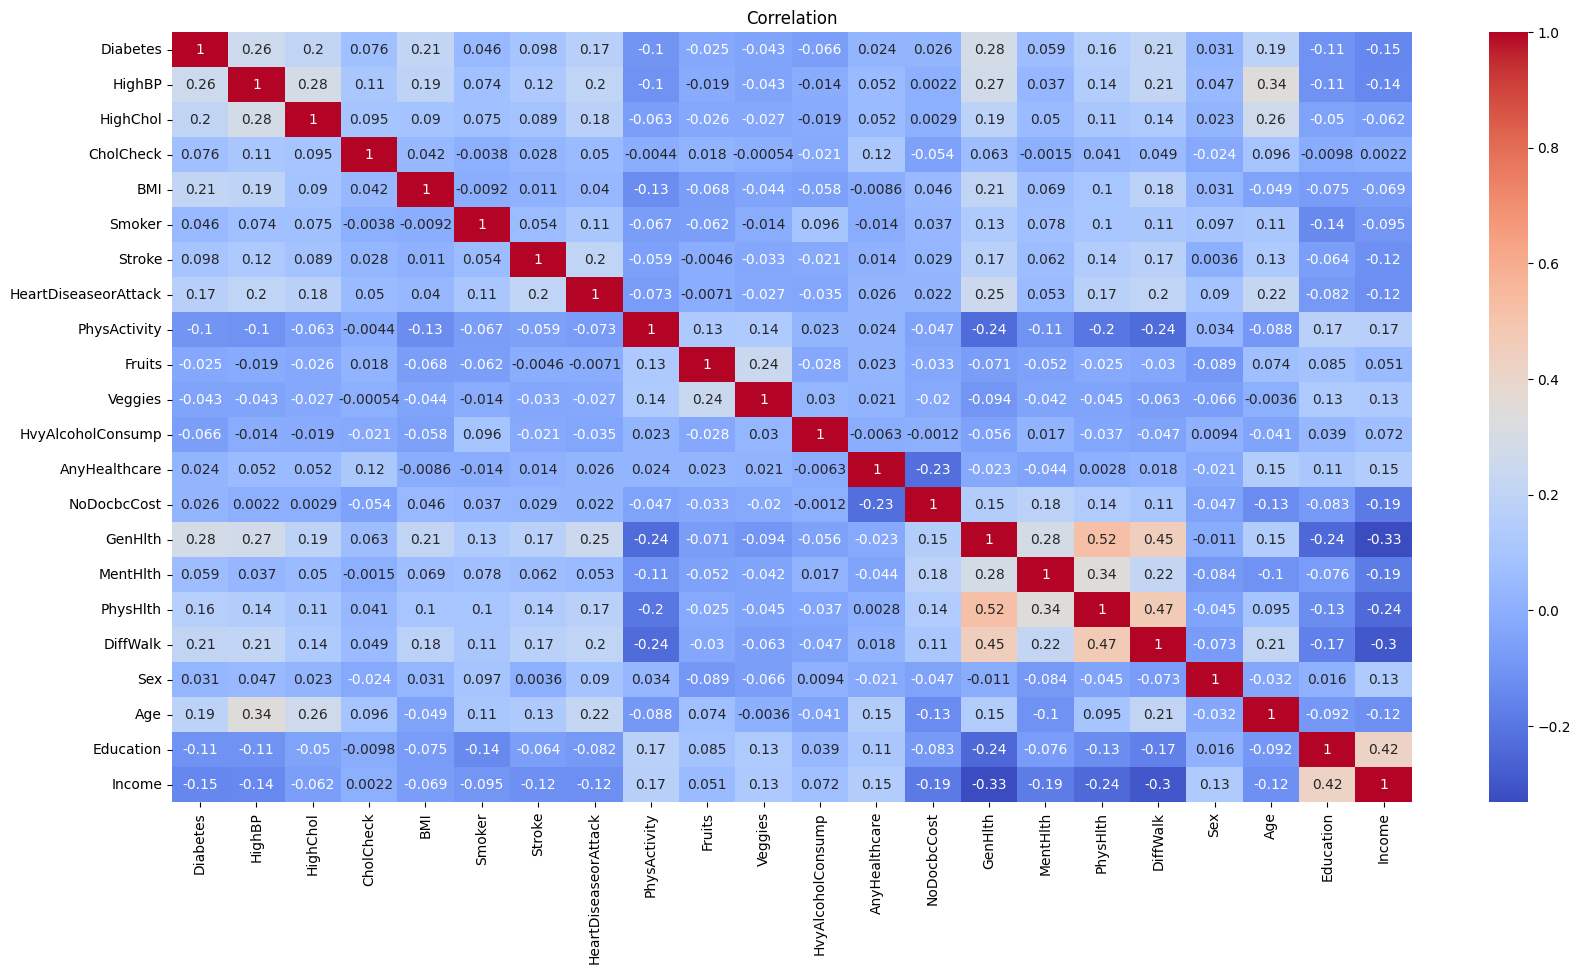

In [95]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='coolwarm' )
plt.title("Correlation")
plt.show()

The correlation heat map shows the relationship between the columns. Correlations between 0.5 and 0.8 are moderate correlations and do not allow to make very clear decisions and correlations above 0.8 are high and do imply a clear correlation between both variables. In our dataset we can observe a moderate correlation between physical health days and health ratio, which makes sense since both columns speak of the respondent's perception of his health status.

Let's plot the histogram to better understand the data in the columns.

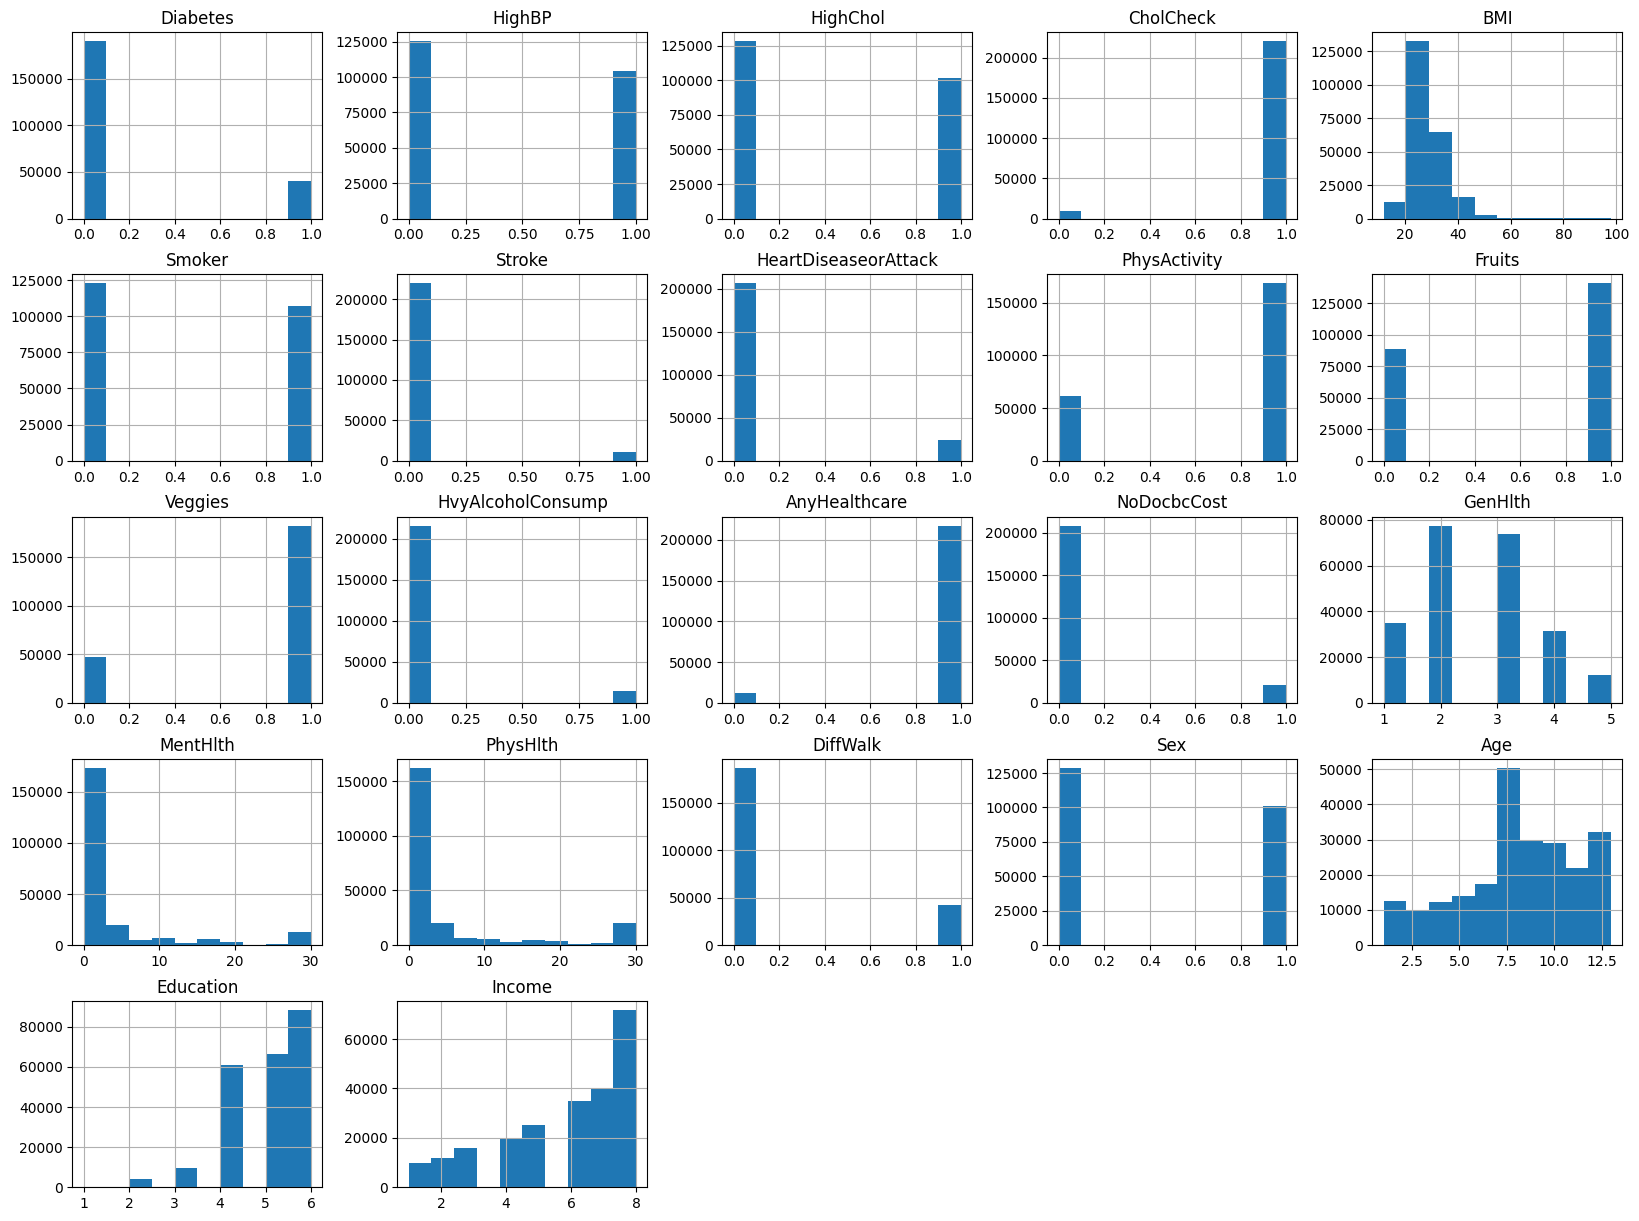

In [96]:
data.hist(figsize=(20,15))
plt.show()

From the graphs we can observe:

    1) there are more women than men in the study.
    2) The majority of the respondents consume fruits and vegetables, and a small amount consumes alcohol.
    3) The majority of the respondents achieved a higher level of education.
    4) The majority of the respondents have a social security system.
    5) The majority of the respondents had no problems paying for a medical consultation in the last 12 months.
    6) In the histogram of the health_ratio column, we can see that the category with more results is the one that perceives their health as bad. 
    7) We can see a similarity in the distribution of physical health days and mental health days, so we can infer that those who perceive their physical health in days as bad or good, perceive their mental health in the same way. 
    8) The majority of respondents have a BMI in the range of 20 to 30. 
    9) The majority of the respondents reported being physically active. 
    10) There is an imbalance between the diabetic and non-diabetic classes.

## Outliers detection:

In [97]:
data.columns

Index(['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

Let us consider only those attributes whose response can be different from 0 and 1.

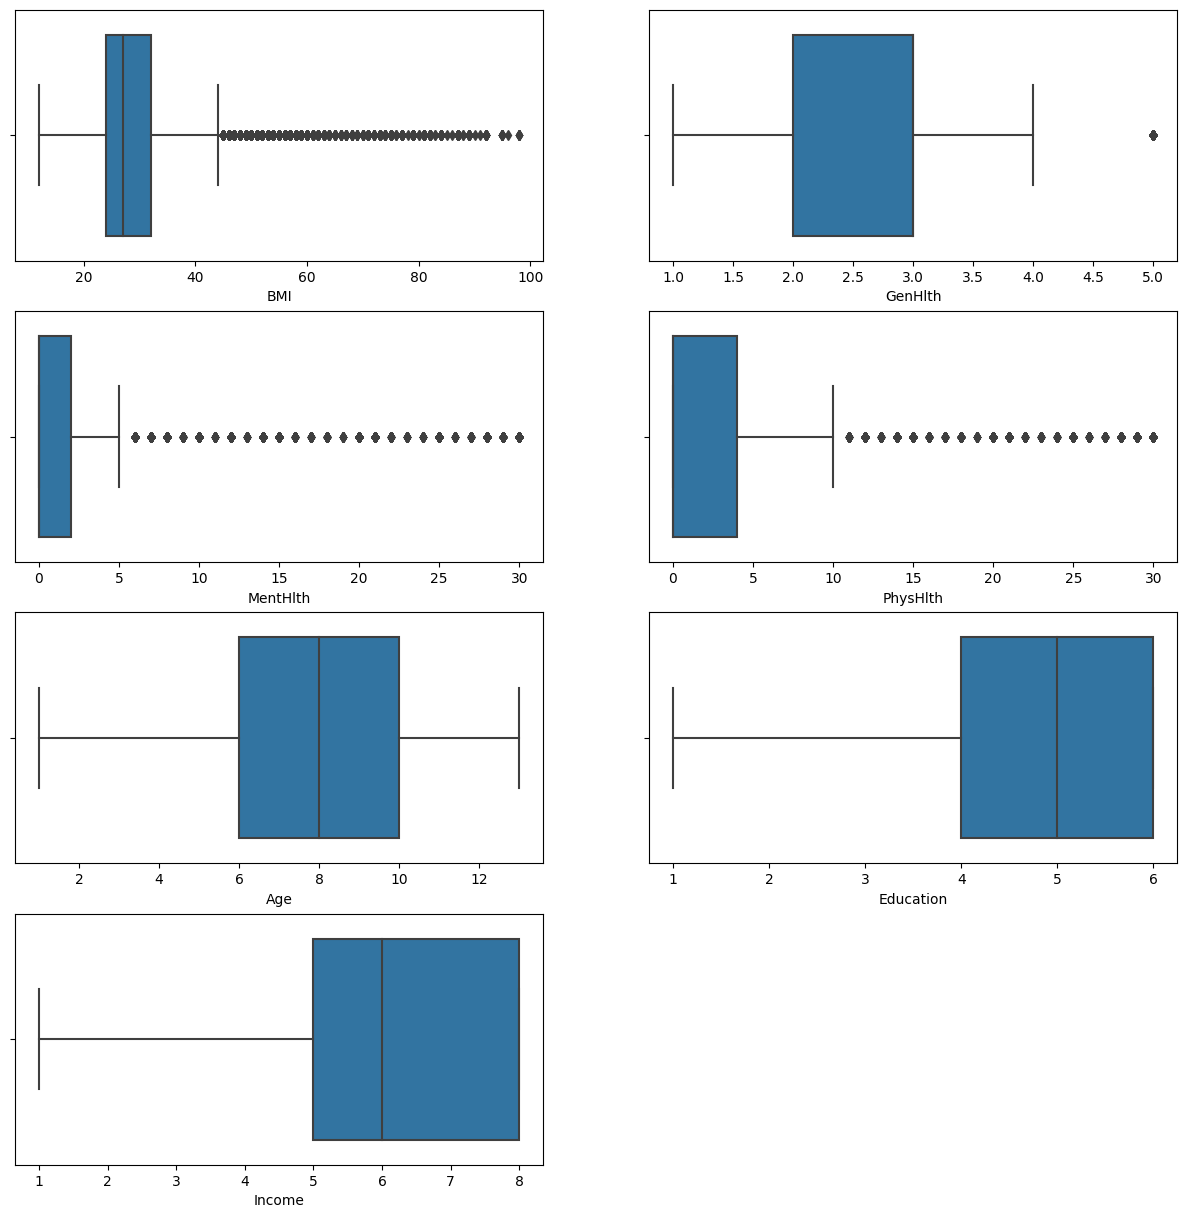

In [100]:
plt.figure(figsize = (15,15))
for i,col in enumerate(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age','Education', 'Income']):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = data )
plt.show()

In [101]:
variables_outliers = data[['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']]

<Axes: xlabel='BMI', ylabel='Density'>

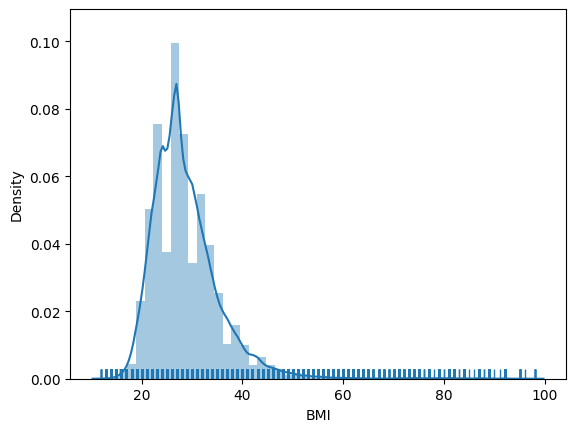

In [102]:
sns.distplot(data['BMI'], hist=True, kde=True, rug=True)

<Axes: xlabel='GenHlth', ylabel='Density'>

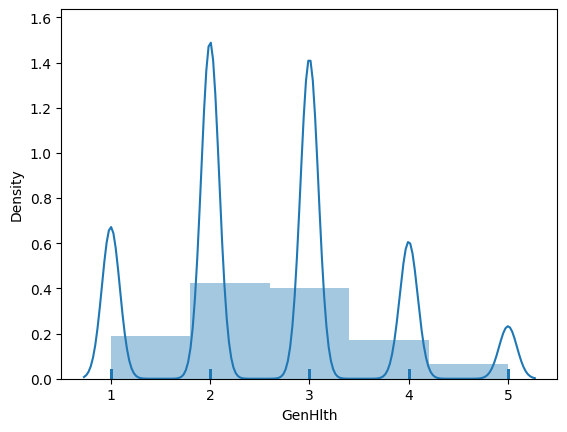

In [103]:
sns.distplot(data['GenHlth'], hist=True, kde=True, rug=True, bins=5)

<Axes: xlabel='PhysHlth', ylabel='Density'>

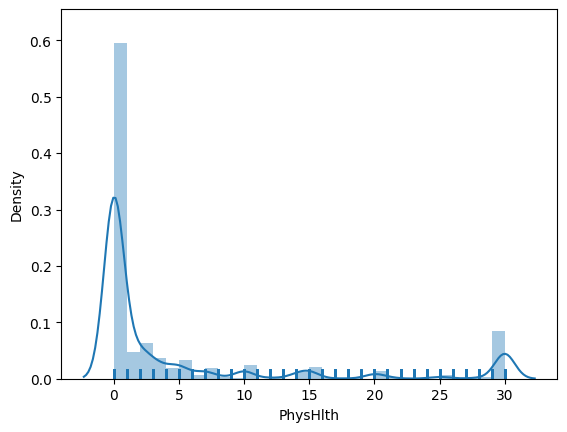

In [104]:
sns.distplot(data['PhysHlth'], hist=True, kde=True, rug=True, bins=30)

<Axes: xlabel='MentHlth', ylabel='Density'>

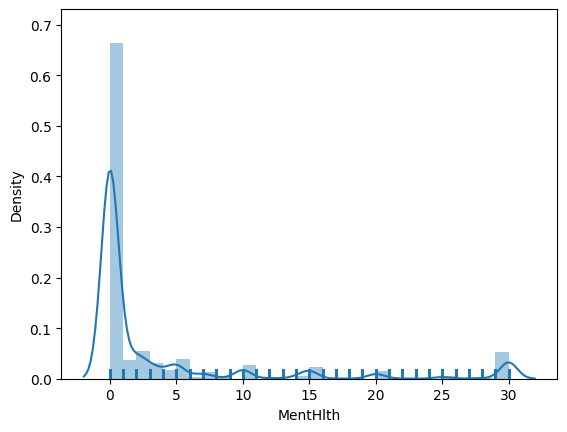

In [105]:
sns.distplot(data['MentHlth'], hist=True, kde=True, rug=True, bins=30)

In [106]:
# Mean vs median
mean = variables_outliers.mean(axis=0)
median = variables_outliers.median(axis=0)

pd.concat([mean, median, mean-median], axis=1, keys=["Mean", "Median", "Diference"])

,Mean,Median,Diference
BMI,28.685670,27.0,1.685670
GenHlth,2.601151,3.0,-0.398849
MentHlth,3.505373,0.0,3.505373
PhysHlth,4.675178,0.0,4.675178


In [107]:
# Obtain 1.5 interquartile range
iqrx15 = (variables_outliers.quantile(.75)-variables_outliers.quantile(.25))*1.5
# Obtain the maximum values
maxs = variables_outliers.max()
# Get the minimum values
mins = variables_outliers.min()
# Define an upper bound equal to the median plus 1.5 times the interquartile range
sup = median+iqrx15
# Define a lower bound equal to the median minus 1.5 times the interquartile range
inf = median-iqrx15
# Check if the maximum values are beyond the upper limit
out_sup = maxs>sup
# Check if the minimum values are beyond the lower limit
out_inf = mins<inf
# Show for which variables there are outliers
pd.concat([out_sup, out_inf], axis=1, keys=["Outlier Sup", "Outlier Inf"])

,Outlier Sup,Outlier Inf
BMI,True,True
GenHlth,True,True
MentHlth,True,False
PhysHlth,True,False


A common approach to handling outliers is to simply remove them from our data set. This method can be effective if the outliers are few and can be clearly identified. However, this approach may not always be the best option, as it can result in the loss of valuable data and potentially bias the predictions of our model.
For this particular project we will not remove outliers, but will instead use the log transformation technique. This technique will be applied on the BMI and health_ratio attributes that have upper and lower outliers. The mental and physical health day columns will not be transformed, but will be normalized with Standar Scaler before training the models.


<Axes: xlabel='BMI', ylabel='Density'>

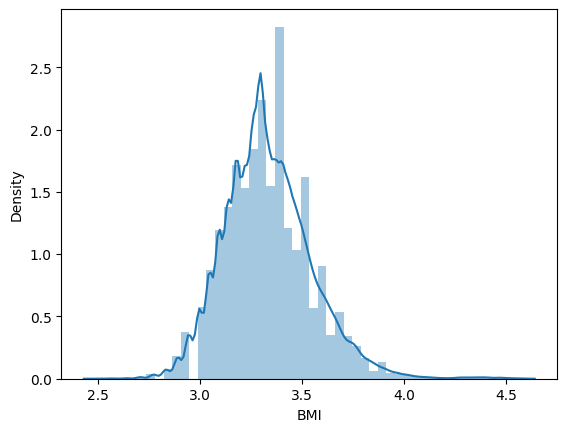

In [108]:
a=np.log(data['BMI'])
sns.distplot(a)

<Axes: xlabel='GenHlth', ylabel='Density'>

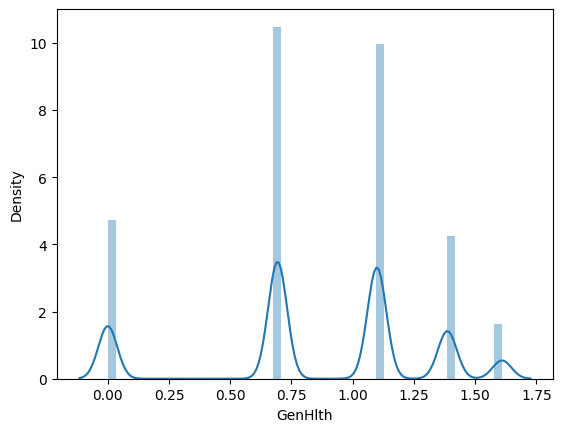

In [109]:
b=np.log(data['GenHlth'])
sns.distplot(b)

In [110]:
data['BMI']= a 

In [111]:
data['GenHlth'] = b

## Hypotheses posed: 

The older the age the greater the risk of having diabetes?

Does high blood pressure increase the risk of diabetes? 

Does high cholesterol increase the risk of diabetes?

Does being a smoker increase the risk of diabetes?

Having suffered a stroke or heart attack increases the risk of having diabetes?

Not eating fruits and vegetables increases the risk of diabetes?

Drinking alcohol increases the risk of having diabetes?

Not being physically active increases the risk of having diabetes?

Do people with difficulty walking have a higher risk of having diabetes? 

Is there any relationship between the income level of the respondents and the disease of diabetes?

Is there any relationship between the level of education of the respondents and the disease of diabetes?

What is the relationship between gender and diabetes disease?

Are people with BMI between 25.0 and 29.9 (overweight) or BMI greater than 30.0 (obese) at higher risk of having diabetes?

Is there a relationship between the health ratio and the physical and mental health days described by the respondents?


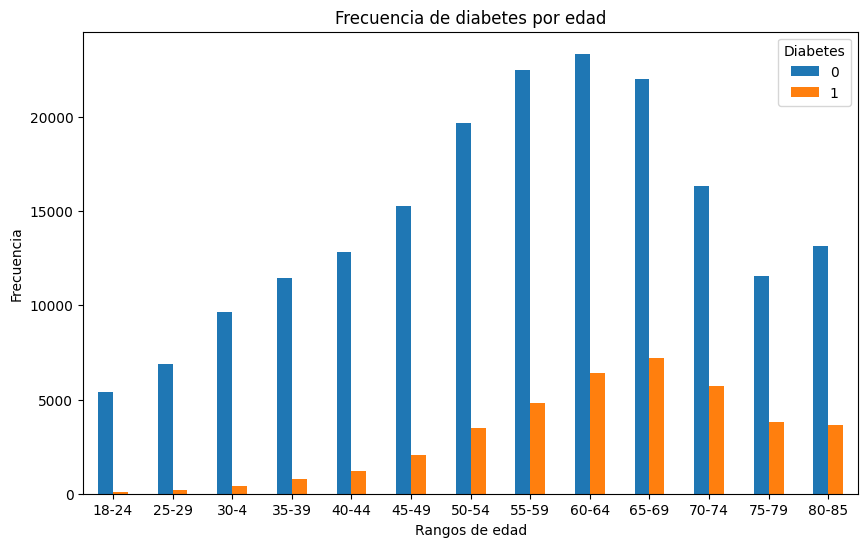

In [112]:
pd.crosstab(data1.Age,data1.Diabetes).plot(kind="bar",figsize=(10,6))
plt.title('Frecuencia de diabetes por edad')
plt.xlabel('Rangos de edad')
plt.xticks(rotation=0)
plt.ylabel('Frecuencia')
plt.show()

We know that as age increases, the chances of having diabetes also commonly increases. From the above we can say, the median age of diabetic people is higher than that of non-diabetic people.
Now we have this column display [Yes - NO] and its relationship with the target:

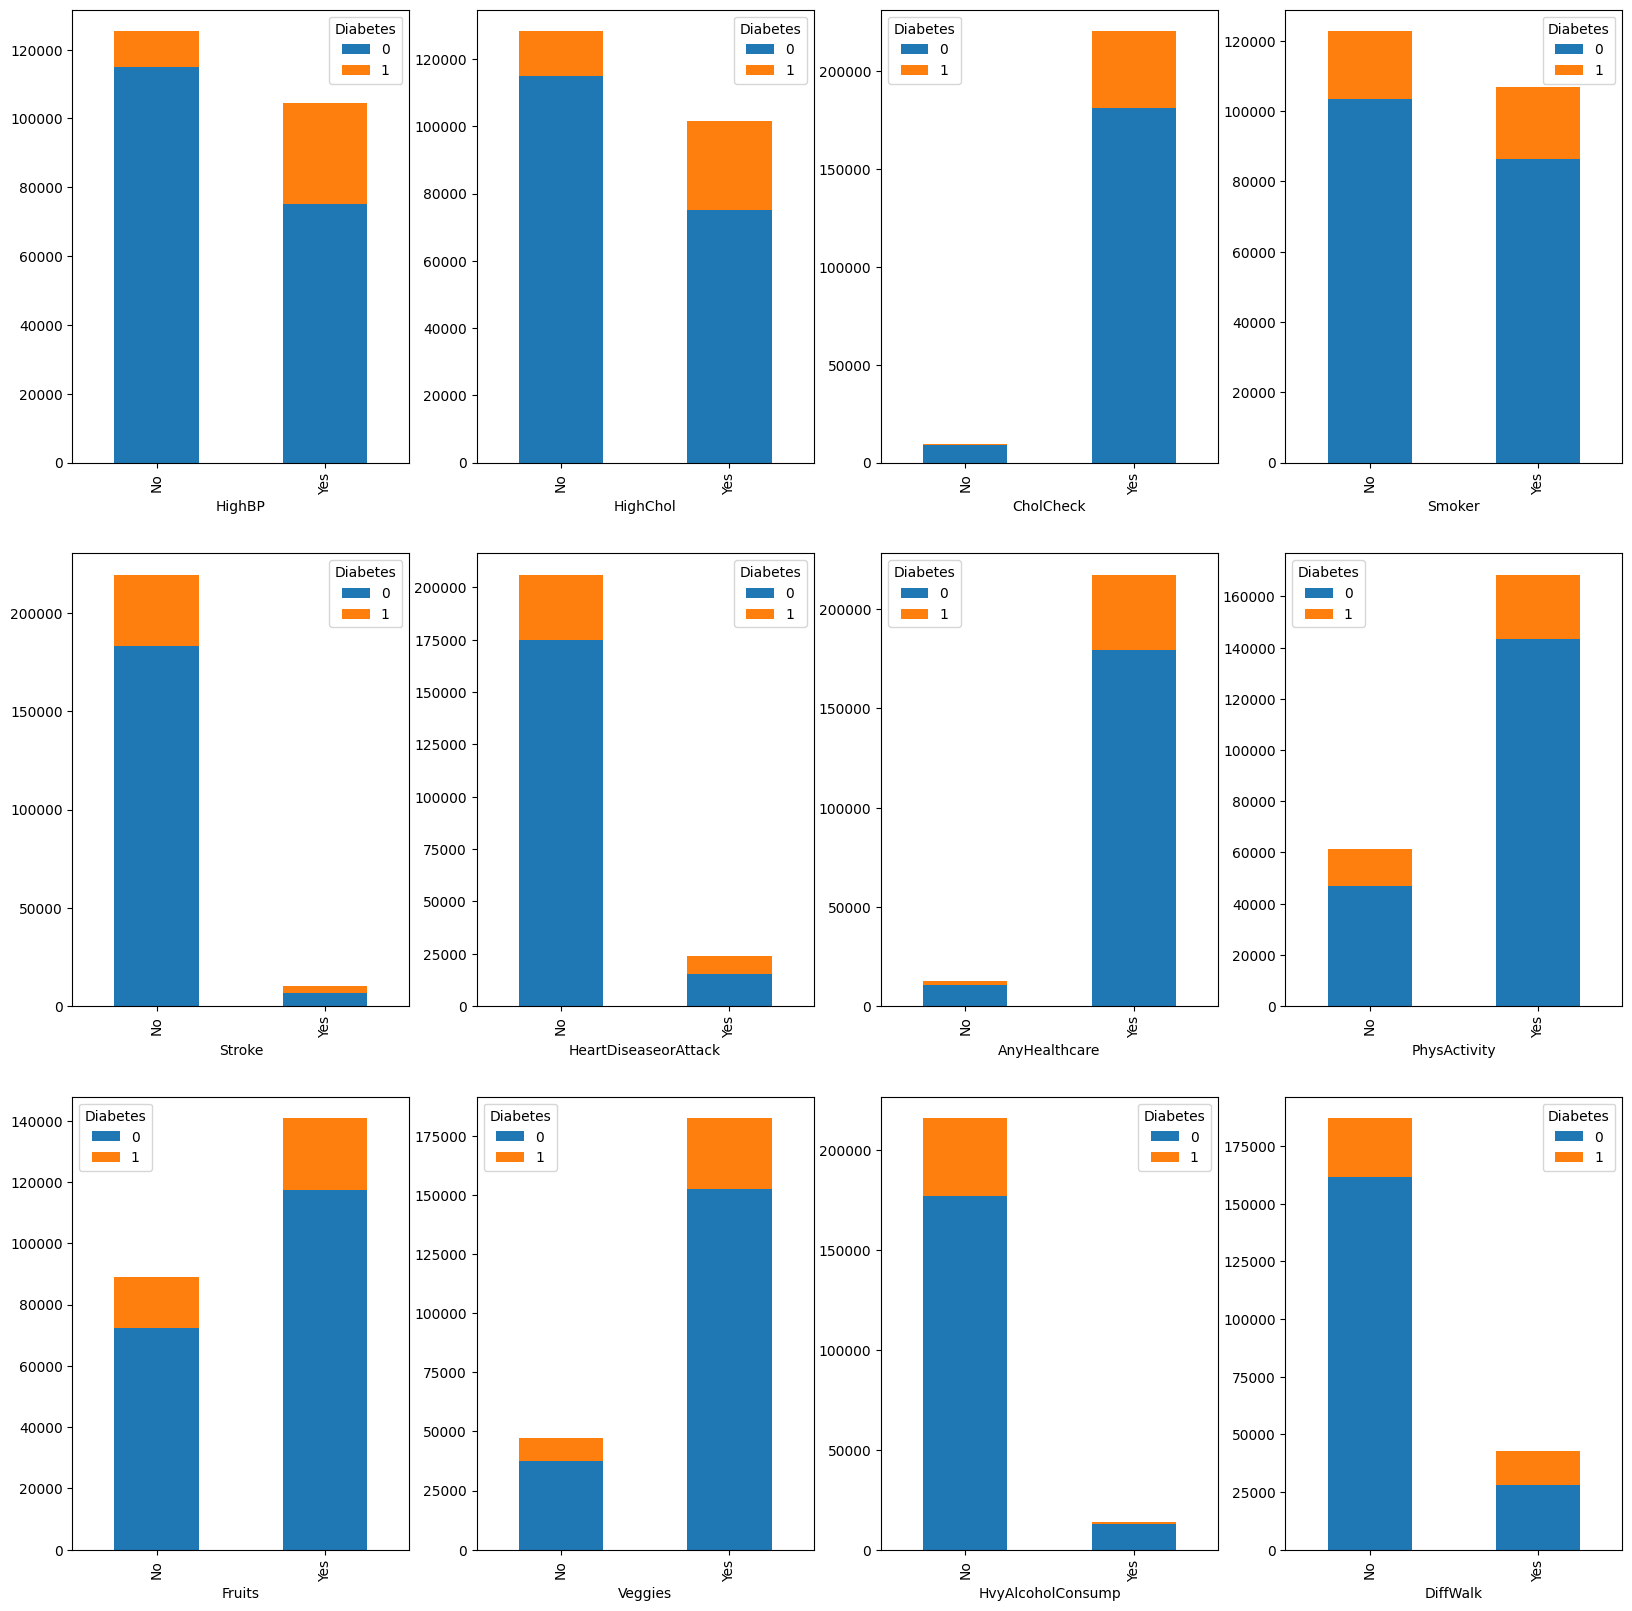

In [113]:
cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'AnyHealthcare',
        'PhysActivity','Fruits','Veggies','HvyAlcoholConsump','DiffWalk']

def create_plot_pivot(data, x_column):
    _df_plot = data1.groupby([x_column, 'Diabetes']).size() \
    .reset_index().pivot(columns='Diabetes', index=x_column, values=0)
    return _df_plot
fig, ax = plt.subplots(3, 4, figsize=(20,20))
axe = ax.ravel()

c = len(cols)

for i in range(c):
    create_plot_pivot(data, cols[i]).plot(kind='bar',stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])
    
fig.show()

**Presión arterial**

In [114]:
data1.groupby(['Diabetes','HighBP'])['Diabetes'].agg(Count='count')

Count
Diabetes HighBP        
0        No      114950
         Yes      75105
1        No       10409
         Yes      29317

In [115]:
(data[data['Diabetes']==0]['HighBP'].value_counts(1).sort_index())

0    0.604825
1    0.395175
Name: HighBP, dtype: float64

In [116]:
(data[data['Diabetes']==1]['HighBP'].value_counts(1).sort_index())

0    0.26202
1    0.73798
Name: HighBP, dtype: float64

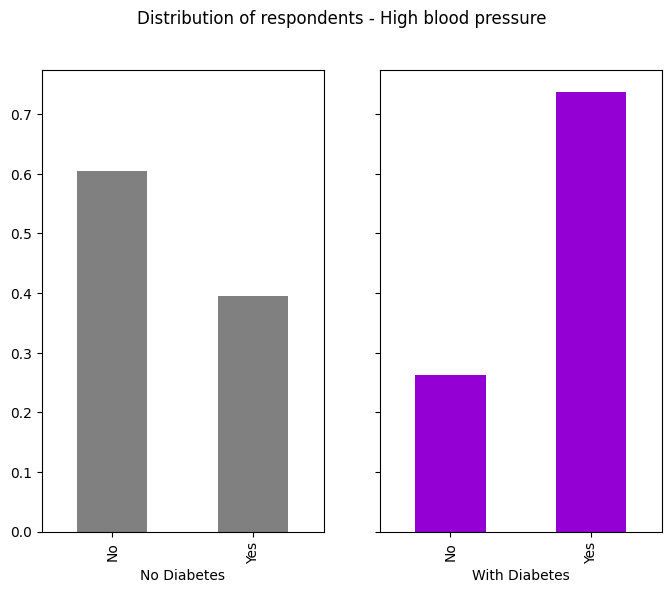

In [117]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of respondents - High blood pressure')
(data[data['Diabetes']==0]['HighBP'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['HighBP'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 73% of respondents with diabetes have high blood pressure, compared to 40% of those without diabetes.

**Cholesterol**

In [119]:
(data[data['Diabetes']==0]['HighChol'].value_counts(1).sort_index())

0    0.604651
1    0.395349
Name: HighChol, dtype: float64

In [120]:
(data[data['Diabetes']==1]['HighChol'].value_counts(1).sort_index())

0    0.336203
1    0.663797
Name: HighChol, dtype: float64

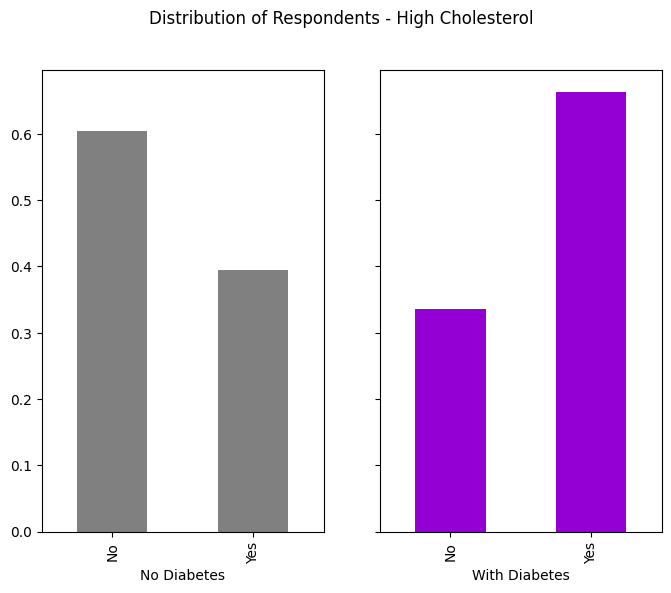

In [122]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of Respondents - High Cholesterol')
(data[data['Diabetes']==0]['HighChol'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['HighChol'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 66% of respondents with diabetes have high cholesterol, compared to 40% of those without diabetes.

In [ ]:
# data = data.rename(
    # columns={
        # 'HighBP':'presión_arterial',
        # 'HighChol': 'colesterol',
        # 'CholCheck':'control_colesterol',
        # 'BMI': 'IMC',
        # 'Smoker':'Fumador',
        # 'Stroke': 'ACV',
        # 'HeartDiseaseorAttack': 'Infarto',
        # 'PhysActivity':'actividad_fisica'
        # 'Fruits':'consume_fruta',
        # 'Veggies':'consume_verduras',
        # 'HvyAlcoholConsump':'consumo_alcohol',
        # 'AnyHealthcare': 'obra_social',
        # 'NoDocbcCost': 'costo_salud',
        # 'GenHlth': 'ratio_salud',
        # 'MentHlth': 'dias_saludmental',
        # 'PhysHlth': 'dias_saludfisica',
        # 'DiffWalk':'dificultad_caminar',
        # 'Sex': 'Sexo',
        # 'Age': 'Edad',
        # 'Education': 'Educacion',
        # 'Income': 'Ingresos'
# )

**Stroke**

In [123]:
(data[data['Diabetes']==0]['Stroke'].value_counts(1).sort_index())

0    0.964479
1    0.035521
Name: Stroke, dtype: float64

In [125]:
(data[data['Diabetes']==1]['Stroke'].value_counts(1).sort_index())

0    0.911066
1    0.088934
Name: Stroke, dtype: float64

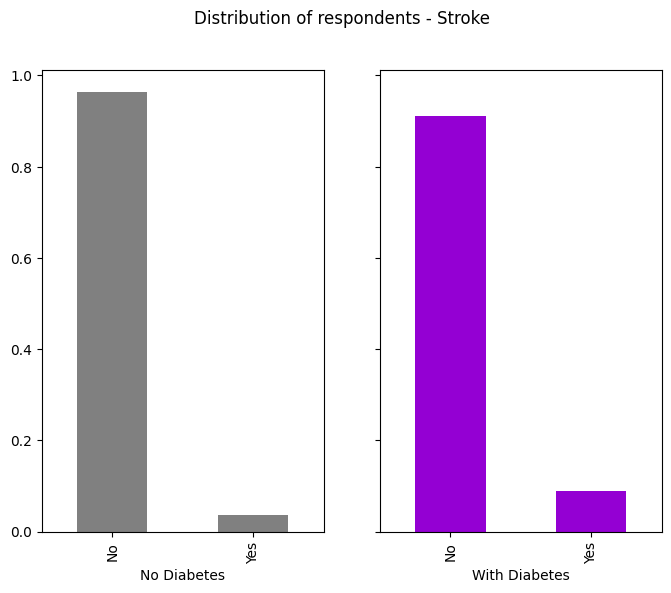

In [126]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of respondents - Stroke')
(data[data['Diabetes']==0]['Stroke'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['Stroke'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 8% of respondents with diabetes suffered a stroke, compared to 3% of those without diabetes.

**HeartDiseaseorAttack**

In [127]:
(data[data['Diabetes']==0]['HeartDiseaseorAttack'].value_counts(1).sort_index())

0    0.920039
1    0.079961
Name: HeartDiseaseorAttack, dtype: float64

In [128]:
(data[data['Diabetes']==1]['HeartDiseaseorAttack'].value_counts(1).sort_index())

0    0.785531
1    0.214469
Name: HeartDiseaseorAttack, dtype: float64

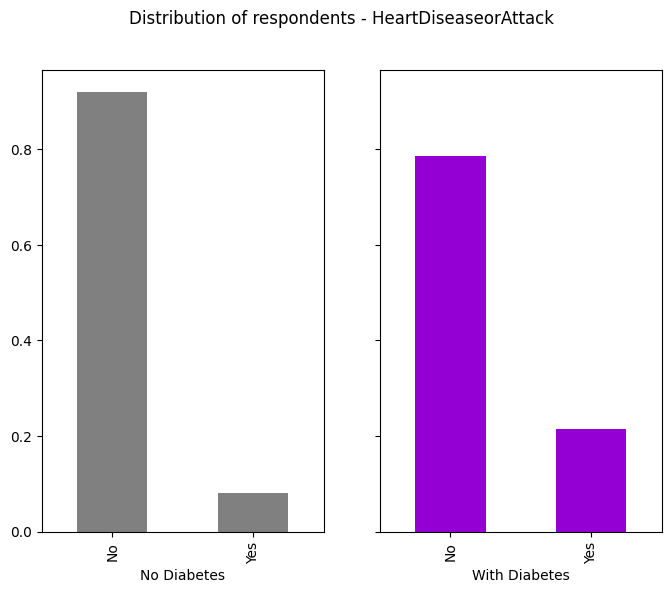

In [129]:
fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
fig.suptitle('Distribution of respondents - HeartDiseaseorAttack')
(data[data['Diabetes']==0]['HeartDiseaseorAttack'].value_counts(1).sort_index().plot(ax=ax,kind='bar',color="grey"))
ax.set_xlabel('No Diabetes',size=10)
ax.set_xticklabels(["No", 'Yes'])

(data[data['Diabetes']==1]['HeartDiseaseorAttack'].value_counts(1).sort_index().plot(ax=ax2, kind='bar',color="darkviolet"))
ax2.set_xlabel('With Diabetes',size=10)
ax2.set_xticklabels(["No", 'Yes'])
plt.show()

We observed that 21% of the respondents with diabetes suffered a heart attack, compared to 7% of those without diabetes.

**Dificultad para caminar**

In [216]:
# (data[data['Diabetes']==0]['dificultad_caminar']
#  .value_counts(1)
#  .sort_index())

0    0.85148
1    0.14852
Name: dificultad_caminar, dtype: float64

In [217]:
# (data[data['Diabetes']==1]['dificultad_caminar']
#  .value_counts(1)
#  .sort_index())

0    0.637542
1    0.362458
Name: dificultad_caminar, dtype: float64

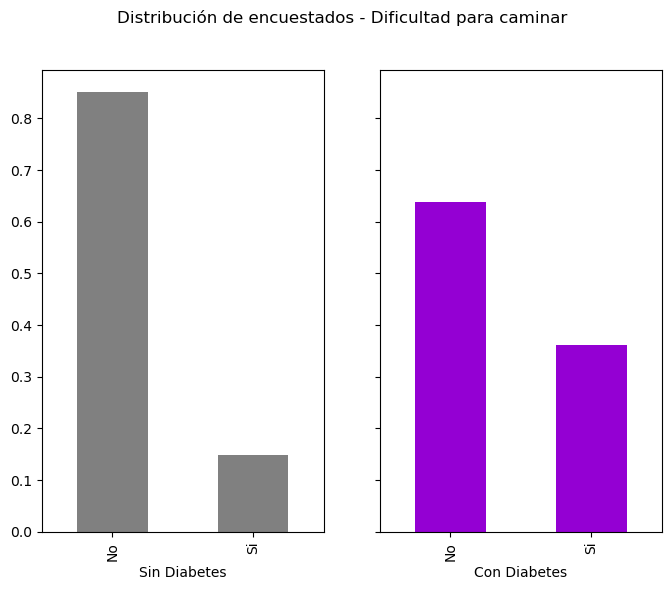

In [93]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Dificultad para caminar')
# (data[data['Diabetes']==0]['dificultad_caminar']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['dificultad_caminar']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Observamos que un 36% de los encuestados con diabetes tienen dificultad para caminar, contra un 14% de quienes no tienen diabetes.

**Consumo de frutas**

In [219]:
# (data[data['Diabetes']==0]['consume_fruta']
#  .value_counts(1)
#  .sort_index())

0    0.381474
1    0.618526
Name: consume_fruta, dtype: float64

In [220]:
# (data[data['Diabetes']==1]['consume_fruta']
#  .value_counts(1)
#  .sort_index())

0    0.413633
1    0.586367
Name: consume_fruta, dtype: float64

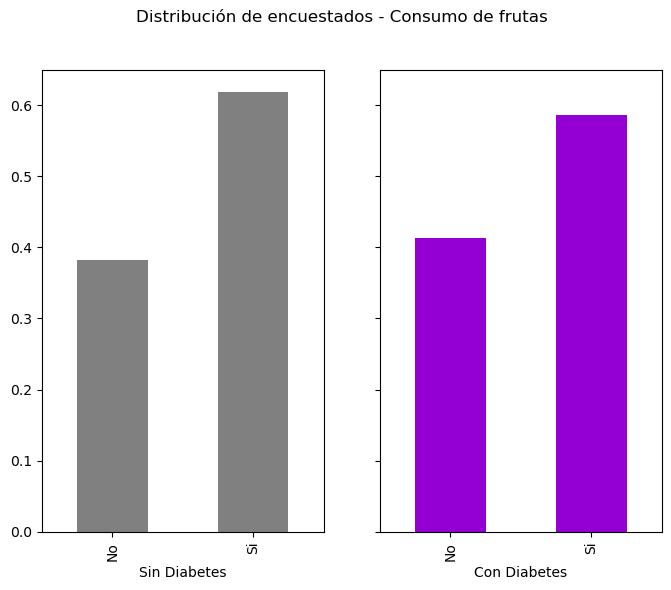

In [94]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Consumo de frutas')
# (data[data['Diabetes']==0]['consume_fruta']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['consume_fruta']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Observamos que el numero es muy similar, un 59% de los encuestados con diabetes consumen frutas, y un 62% de los encuestados que no sufren diabetes tambien comen frutas

**Consumo de verduras**

In [222]:
# (data[data['Diabetes']==0]['consume_verduras']
#  .value_counts(1)
#  .sort_index())

0    0.197185
1    0.802815
Name: consume_verduras, dtype: float64

In [225]:
# (data[data['Diabetes']==1]['consume_verduras']
#  .value_counts(1)
#  .sort_index())

0    0.243468
1    0.756532
Name: consume_verduras, dtype: float64

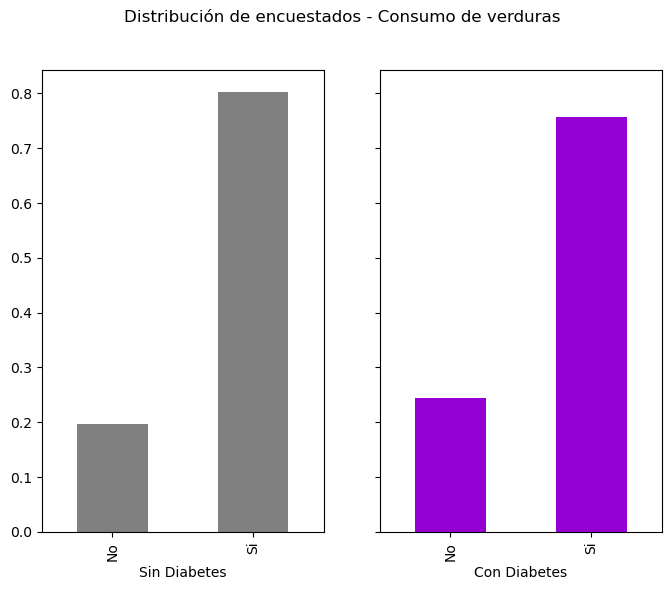

In [95]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Consumo de verduras')
# (data[data['Diabetes']==0]['consume_verduras']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['consume_verduras']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Para las verduras, un 5% mas de quienes no tienen diabetes consumen verduras en comparacion con quienes si tienen diabetes. 

**Consumo de alcohol**

In [226]:
# (data[data['Diabetes']==0]['consumo_alcohol']
#  .value_counts(1)
#  .sort_index())

0    0.932072
1    0.067928
Name: consumo_alcohol, dtype: float64

In [227]:
# (data[data['Diabetes']==1]['consumo_alcohol']
#  .value_counts(1)
#  .sort_index())

0    0.973821
1    0.026179
Name: consumo_alcohol, dtype: float64

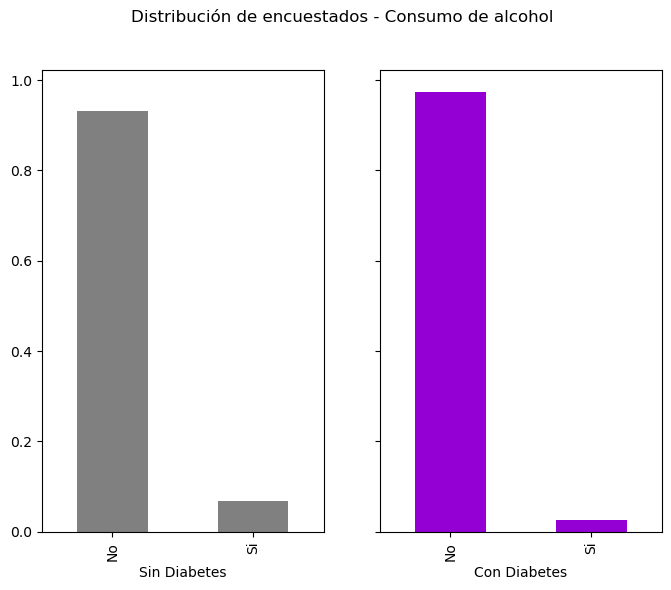

In [97]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Consumo de alcohol')
# (data[data['Diabetes']==0]['consumo_alcohol']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['consumo_alcohol']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Observamos que un 2% de los encuestados con diabetes consumen alcohol, contra un 6% de quienes no tienen diabetes.

**Fumador**

In [73]:
# (data[data['Diabetes']==0]['Fumador']
#  .value_counts(1)
#  .sort_index())

0    0.54489
1    0.45511
Name: Fumador, dtype: float64

In [74]:
# (data[data['Diabetes']==1]['Fumador']
#  .value_counts(1)
#  .sort_index())

0    0.483864
1    0.516136
Name: Fumador, dtype: float64

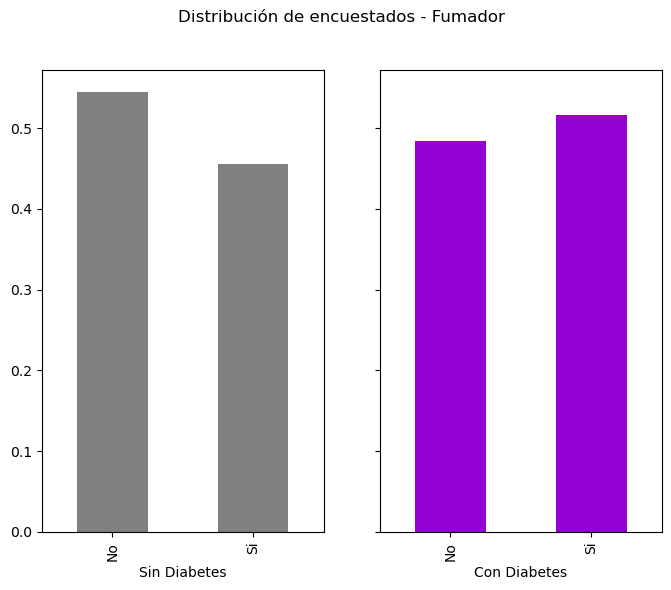

In [83]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Fumador')
# (data[data['Diabetes']==0]['Fumador']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['Fumador']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Observamos que un 51% de los encuestados con diabetes son fumadores, contra un 45% de quienes no tienen diabetes.

**Costo salud**

In [41]:
# (data[data['Diabetes']==0]['costo_salud']
#  .value_counts(1)
#  .sort_index())

0    0.910631
1    0.089369
Name: costo_salud, dtype: float64

In [42]:
# (data[data['Diabetes']==1]['costo_salud']
#  .value_counts(1)
#  .sort_index())

0    0.890726
1    0.109274
Name: costo_salud, dtype: float64

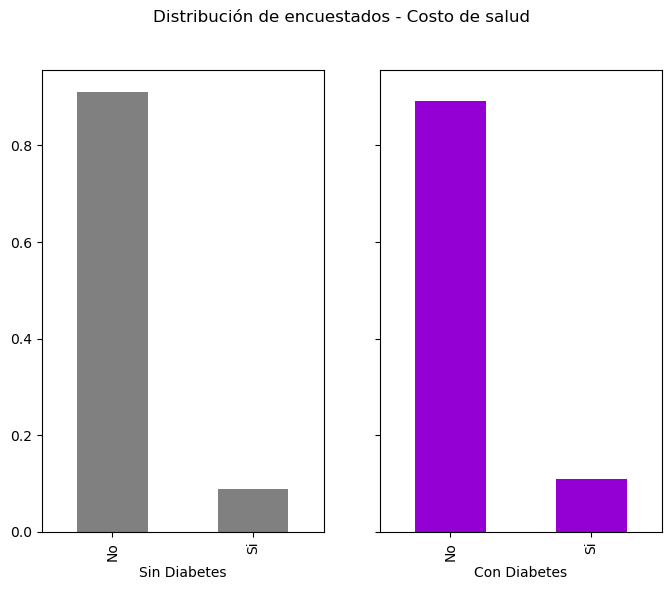

In [43]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Costo de salud')
# (data[data['Diabetes']==0]['costo_salud']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['costo_salud']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Observamos que un 11% de los encuestados con diabetes en los últimos 12 meses necesitaron ver a un médico pero no pudieron debido al costo, contra un 8% de quienes no tienen diabetes.

**Control colesterol**

In [44]:
# (data[data['Diabetes']==0]['control_colesterol']
#  .value_counts(1)
#  .sort_index())

0    0.047328
1    0.952672
Name: control_colesterol, dtype: float64

In [45]:
# (data[data['Diabetes']==1]['control_colesterol']
#  .value_counts(1)
#  .sort_index())

0    0.007627
1    0.992373
Name: control_colesterol, dtype: float64

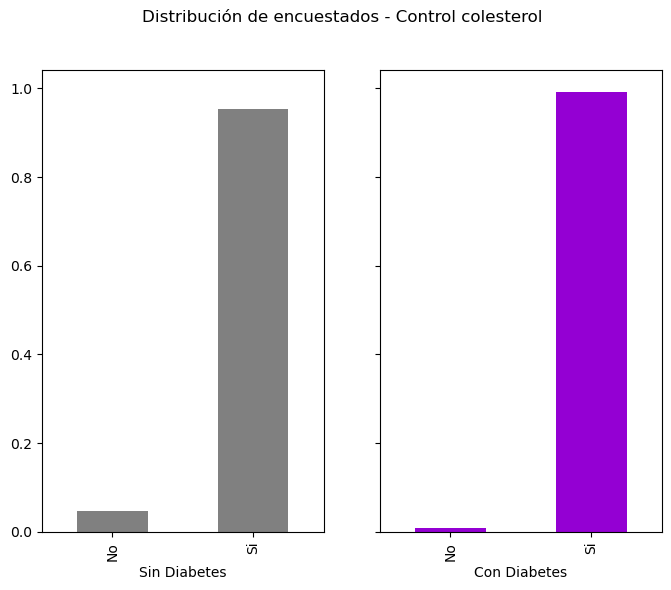

In [46]:
# fig,(ax, ax2) = plt.subplots(1, 2, figsize=(8,6),sharey=True)
# fig.suptitle('Distribución de encuestados - Control colesterol')
# (data[data['Diabetes']==0]['control_colesterol']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax,kind='bar',color="grey"))
# ax.set_xlabel('Sin Diabetes',size=10)
# ax.set_xticklabels(["No", 'Si'])

# (data[data['Diabetes']==1]['control_colesterol']
#  .value_counts(1)
#  .sort_index()
#  .plot(ax=ax2, kind='bar',color="darkviolet"))
# ax2.set_xlabel('Con Diabetes',size=10)
# ax2.set_xticklabels(["No", 'Si'])
# plt.show()

Observamos que un 99% de los encuestados con diabetes realizaron un control de colesterol en los últimos cinco años, contra un 95% de quienes no tienen diabetes.

**Income**

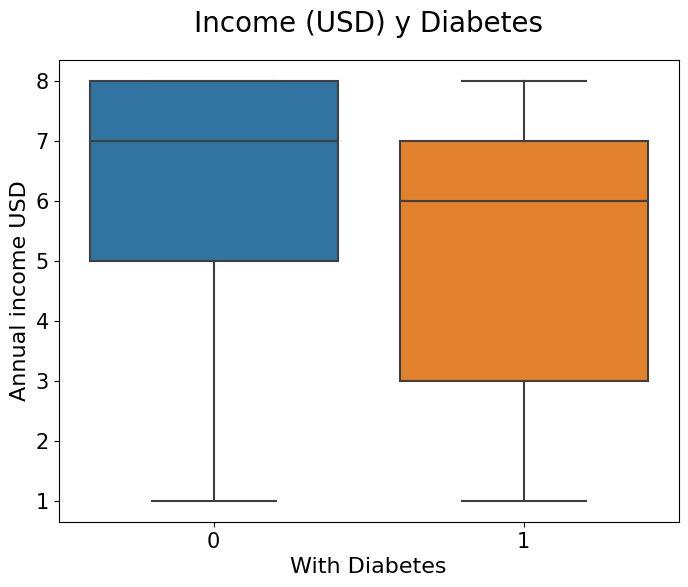

In [130]:
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)

bp = sns.boxplot(x="Diabetes", y="Income" ,data=data)
bp.axes.set_title("Income (USD) y Diabetes",fontsize=20, pad=20)
bp.set_xlabel("With Diabetes",fontsize=16)
bp.set_ylabel("Annual income USD",fontsize=16)
bp.tick_params(labelsize=15)

Text(0.5, 1.0, 'Income distribution of respondents with Diabetes')

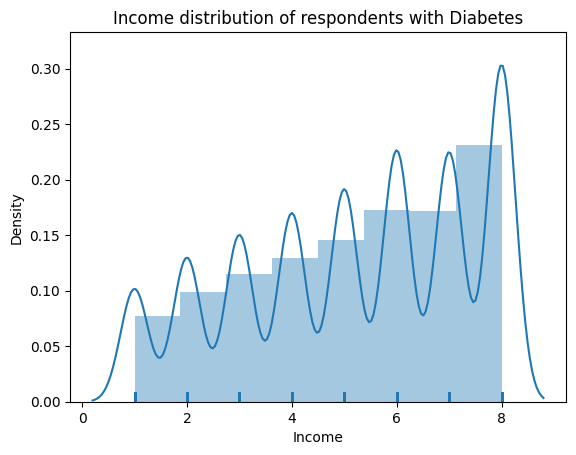

In [131]:
sns.distplot(data[data['Diabetes']==1]['Income'], hist=True, kde=True, rug=True, bins = 8)
plt.title("Income distribution of respondents with Diabetes")

Text(0.5, 1.0, 'Income distribution of respondents without Diabetes')

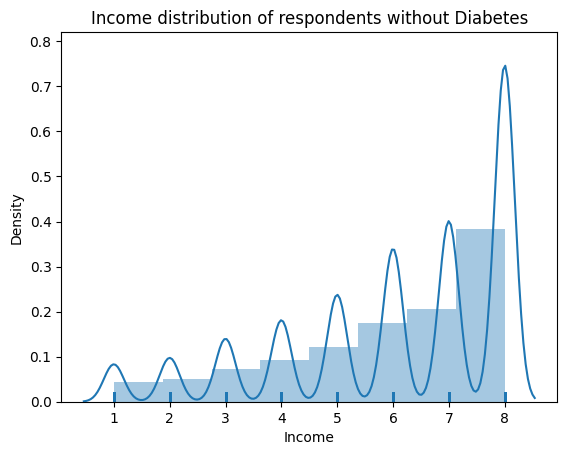

In [132]:
sns.distplot(data[data['Diabetes']==0]['Income'], hist=True, kde=True, rug=True, bins = 8)
plt.title("Income distribution of respondents without Diabetes")

The median of those with diabetes is lower than the median income of those without diabetes. 
The majority of respondents have high income levels. 
In the lower income ranges we have more respondents with diabetes.

**Education**

In [ ]:
plt.figure(figsize=(15, 10))

plt_1 = sns.countplot(data1.Education[data1.Diabetes == 0], color = 'plum' ,label="Non Diabetic")
sns.countplot(data1.Education[data1.Diabetes == 1], color = 'darkviolet',label="Diabetic")
plt.title("Relationship between level of education and Diabetes")

plt.legend()

for item in plt_1.get_xticklabels():
    item.set_rotation(90)

We can visualize that as the level of education achieved by the respondents increases, we discover that a greater number of them suffer from diabetes.
of the latter suffer from diabetes, however, most of our respondents achieved a high educational level, so the educational level of the respondent is not really determinant for not having diabetes.

**Sex**

In [145]:
data1.groupby(['Sex','Diabetes'])['Diabetes'].agg(Count='count')

Count
Sex   Diabetes        
Man   0          82150
      1          18777
Woman 0         107905
      1          20949

In [146]:
20949/(107905 + 20949) # mujeres

0.16257935337668988

In [147]:
18777/(82150+18777) # hombres 

0.18604535951727486

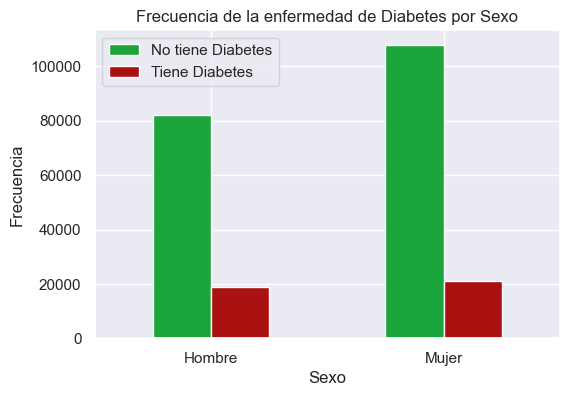

In [197]:
pd.crosstab(data1.Sexo,data1.Diabetes).plot(kind="bar",figsize=(6,4),color=['#1CA53B','#AA1111' ])
plt.title('Frecuencia de la enfermedad de Diabetes por Sexo')
plt.xlabel('Sexo')
plt.xticks(rotation=0)
plt.legend(["No tiene Diabetes","Tiene Diabetes"])
plt.ylabel('Frecuencia')
plt.show()

Del grafico podemos observar que hay mas mujeres que hombres con diabetes, sin embargo, hay mas muejeres que hombres en el estudio.Tomando la cantidad de hombres con diabetes sobre la cantidad total de hombres encuestados, el porcentaje es de un 19%; el cual es mayor al porcentaje de mujeres con diabetes sobre el total de mujeres encuestadas que es un 16%.

**IMC**

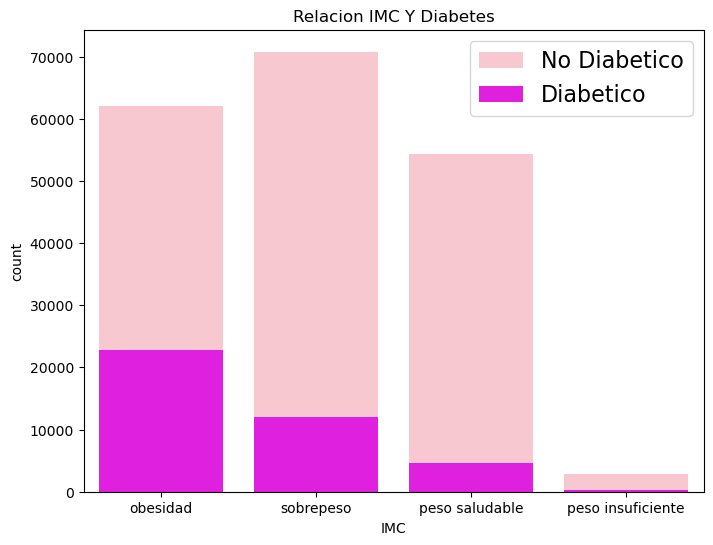

In [49]:
plt.figure(figsize=(8, 6))

sns.countplot(data1.IMC[data1.Diabetes == 0], color="pink", label="No Diabetico")
sns.countplot(data1.IMC[data1.Diabetes == 1], color="magenta", label="Diabetico")
plt.title("Relacion IMC Y Diabetes")


plt.legend( fontsize=16)

Las personas con un IMC entre 25.0 y 30, se encuentran dentro del rango de sobrepeso; y las personas con un IMC mayor a 30.0 se encuentran dentro del rango de obesidad; vemos que en los encuestados con estas caracteristicas hay mayor cantidad que tienen la enfermedad de diabetes. 

**Ratio de Salud**

<AxesSubplot:xlabel='ratio_salud', ylabel='Count'>

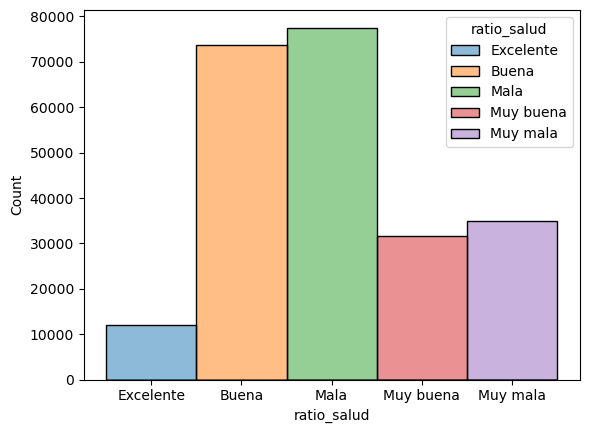

In [57]:
sns.histplot(data=data1, x="ratio_salud", hue="ratio_salud")

**Días salud fisica**

Text(0.5, 1.0, 'Histograma días de salud fisica')

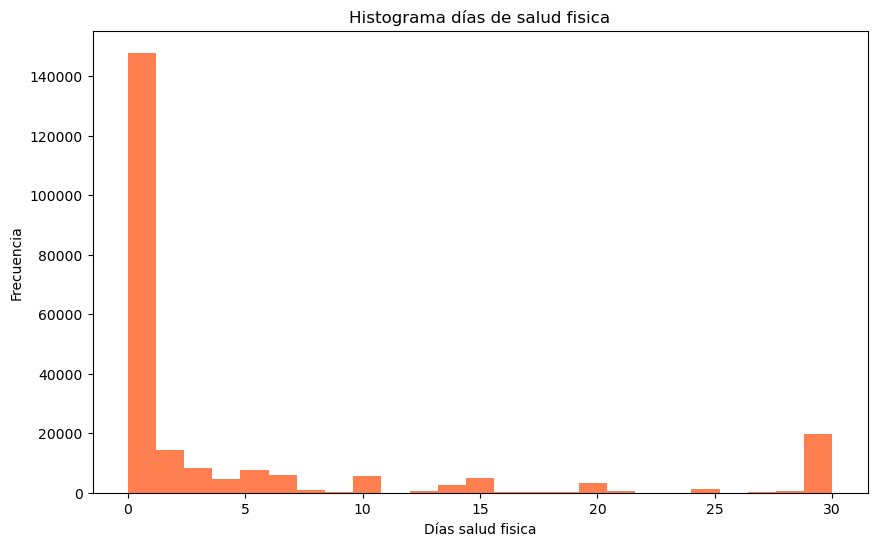

In [58]:

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= data.dias_saludfisica, bins=25, density=False, orientation='vertical', color = 'coral')
ax.set_xlabel('Días salud fisica')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma días de salud fisica')

**Días salud mental**

Text(0.5, 1.0, 'Histograma días de salud mental')

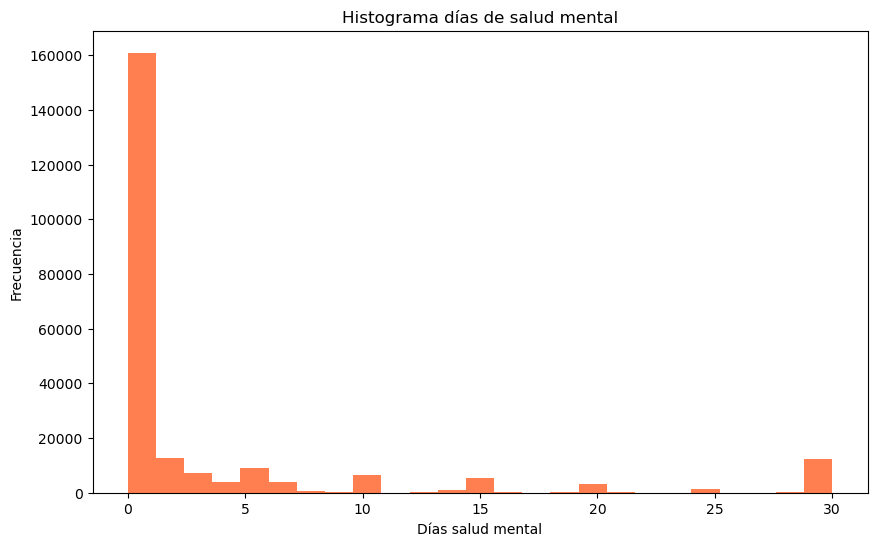

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(x= data.dias_saludmental, bins=25, density=False, orientation='vertical', color = 'coral')
ax.set_xlabel('Días salud mental')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma días de salud mental')

Observando el histograma de días de salud mental y fisica, mas de cien mil encuestados respondieron que en los últimos 30 días, como máximo, un día estuvieron enfermos o con lesiones, o deprimidos o con estrés.
Podemos concluir que hay una relacion entre la salud fisica y mental, teniendo en cuenta que una afecta/influye sobre la otra. 

## Selección del algoritmo: 


¿Qué queremos conseguir con el modelo? clasificar datos en dos clases: Diabetico y no diabetico


¿Con qué datos contamos para resolver el problema? Datos etiquetados


Conclusión:  algoritmo de aprendizaje supervisado, clasificación 

En las evaluaciones de nuestros modelos prestaremos especial atencion a la sensibilidad(recall), ya que, en el área de la salud decimos que la sensibilidad(recall) es la capacidad de poder detectar correctamente la enfermedad entre los enfermos.Son casos en los que perder un caso positivo tiene un costo mucho mayor que clasificar erróneamente un caso como positivo.
Por otro lado prestaremos tambien atencion a los falsos negativos, error de tipo II, ya que, para este caso, significa clasificar a un paciente con diabetes como si no tendria la enfermedad. 

Nuestro objetivo es obtener una recall minima del 75% 

## Separo variables de target

In [321]:
X = data.drop('Diabetes', 1)  

In [322]:
y = data['Diabetes']   

## Feature Selection

In [164]:
from sklearn.feature_selection import SelectKBest

In [165]:
selector = SelectKBest(k=16)

In [166]:
selector.fit(X,y)

SelectKBest(k=16)

Text(0.5, 1.0, 'Importancia de cada feature')

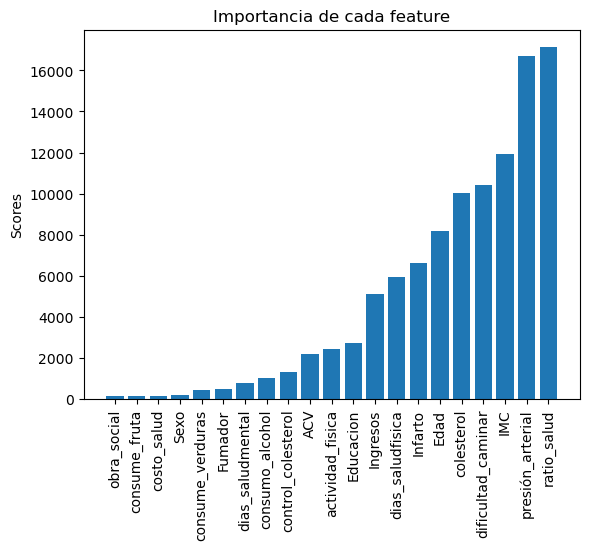

In [167]:
scores = selector.scores_

sorted_indices = np.argsort(scores)

plt.bar(np.arange(len(X.columns)), scores[sorted_indices])
plt.xticks(np.arange(len(X.columns)), X.columns[sorted_indices], rotation=90)
plt.ylabel('Scores')
plt.title('Importancia de cada feature')

In [168]:
mask = selector.get_support()

selected_features = X.columns[mask]

print("Varibles Seleccionadas:", selected_features)

Varibles Seleccionadas: Index(['presión_arterial', 'colesterol', 'control_colesterol', 'IMC',
       'Fumador', 'ACV', 'Infarto', 'actividad_fisica', 'consumo_alcohol',
       'ratio_salud', 'dias_saludmental', 'dias_saludfisica',
       'dificultad_caminar', 'Edad', 'Educacion', 'Ingresos'],
      dtype='object')


Las variables seleccionadas son coherentes con el Analisis exploratorio de datos 

## Elimino atributos segun seleccion

In [323]:
cols_to_drop = data[['consume_fruta','consume_verduras', 'obra_social',
      'costo_salud', 'Sexo']]

In [324]:
X1 = X.drop(cols_to_drop, axis=1) 

In [325]:
X1.columns

Index(['presión_arterial', 'colesterol', 'control_colesterol', 'IMC',
       'Fumador', 'ACV', 'Infarto', 'actividad_fisica', 'consumo_alcohol',
       'ratio_salud', 'dias_saludmental', 'dias_saludfisica',
       'dificultad_caminar', 'Edad', 'Educacion', 'Ingresos'],
      dtype='object')

## Balanceo de clases

In [326]:
X1.shape

(229781, 16)

In [327]:
y.shape

(229781,)

In [328]:
y.value_counts()

0    190055
1     39726
Name: Diabetes, dtype: int64

El conjunto de datos está desequilibrado, necesitamos equilibrarlo para obtener un mejor modelo, ya que predecir que un encuestado no es diabético tiene más posibilidades que predecir que es diabético. 

Vamos a  equilibrarlos descartando la clase mayoritaria antes de aplicar un algoritmo de ML.
Utilizamos Near-Miss de la libreria 'imblearn'

In [329]:
from imblearn.under_sampling import NearMiss
nm = NearMiss(version = 1)

X_sm,y_sm = nm.fit_resample(X1,y)


<AxesSubplot:title={'center':'Distribución de etiquetas después del submuestreo'}>

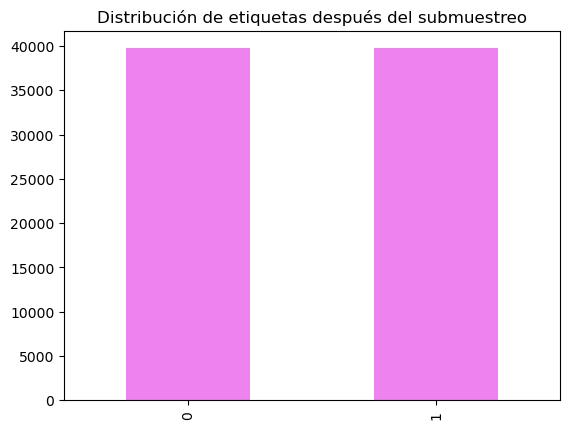

In [330]:
#Pintamos la nueva distribución 
y_sm.value_counts().plot(kind='bar', title='Distribución de etiquetas después del submuestreo', color = 'violet')

## División de conjuntos de datos en train y test

In [331]:
X_train , X_test , y_train , y_test = train_test_split(X_sm,y_sm, test_size=0.2 , random_state=42)

In [332]:
print("Ejemplos usados para entrenar: ", len(X_train))
print("Ejemplos usados para test: ", len(X_test))

Ejemplos usados para entrenar:  63561
Ejemplos usados para test:  15891


## Data Scalling 

La estandarización de un conjunto de datos implica volver a escalar la distribución de valores para que la media de los valores observados sea 0 y la desviación estándar sea 1.

Escalar las características es de suma importancia porque las diferentes características están en diferentes escalas.

In [333]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model Building

Entrenaremos 4 algoritmos que utilizan Métodos de Ensamble
- LightGBM
- Random Forest
- XgBoost
- Gradient Boosting 

**HyperParameter Tuning**

## LGBMClassifier

Un enfoque para equilibrar la precisión de GridSearchCV con la velocidad de RandomizedSearchCV es usar una combinación de ambos métodos.

Podemos comenzar usando RandomizedSearchCV para muestrear una gran cantidad de hiperparámetros de las distribuciones especificadas. Esto puede ayudarnos a explorar rápidamente el espacio de búsqueda e identificar las regiones que son más prometedoras. Una vez que identificamos una región prometedora, usamos GridSearchCV para realizar una búsqueda más específica en esa región, utilizando un rango más pequeño de valores de hiperparámetros.

Al combinar los dos métodos, aprovechamos la velocidad de RandomizedSearchCV para explorar rápidamente el espacio de búsqueda, al mismo tiempo que contamos con  la precisión de GridSearchCV para realizar una búsqueda más enfocada en regiones prometedoras.

In [440]:
# Aplico tuning de hyperparametros del modelo
LG = lgb.LGBMClassifier(random_state = 42)

param_dist_LG = {
    'num_leaves': sp_randint(6, 50),
    'max_depth': sp_randint(3, 10),
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# Defino Randomized search
LG_RS = RandomizedSearchCV(
       estimator  = LG,
       param_distributions = param_dist_LG,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1,
       n_iter=50
       )



In [442]:
# Entrenar
lg_RS_result = LG_RS.fit(X_train, y_train)

# Sumarizo resultados
print("Best: %f using %s" % (lg_RS_result.best_score_, lg_RS_result.best_params_))

Best: 0.778786 using {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'num_leaves': 11, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [444]:
# Obtener los mejores hiperparámetros de randomized search
best_params_LG = lg_RS_result.best_params_

In [445]:
best_params_LG 

{'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 300,
 'num_leaves': 11,
 'reg_alpha': 0,
 'reg_lambda': 0.5}

In [449]:
# Defino Grid search
params_LG = {'n_estimators': [best_params_LG['n_estimators'] - 50, best_params_LG['n_estimators'], best_params_LG['n_estimators'] + 50,
                             best_params_LG['n_estimators'] + 25,best_params_LG['n_estimators'] -25],
            'max_depth': [best_params_LG['max_depth'] - 1, best_params_LG['max_depth'], best_params_LG['max_depth'] + 1],
            'num_leaves': [best_params_LG['num_leaves'] - 1, best_params_LG['num_leaves'], best_params_LG['num_leaves'] + 1],
            'reg_alpha': [best_params_LG['reg_alpha'] - 0.1, best_params_LG['reg_alpha'], best_params_LG['reg_alpha'] + 0.1],
            'reg_lambda': [best_params_LG['reg_lambda'] - 0.1, best_params_LG['reg_lambda'], best_params_LG['reg_lambda'] + 0.1],
            'learning_rate': [best_params_LG['learning_rate'] - 0.1, best_params_LG['learning_rate'], best_params_LG['learning_rate'] + 0.1]
            
            }

LG_GS = GridSearchCV(    
       estimator  = LG,
       param_grid = params_LG,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1
       )

In [450]:
# Entrenar
LG_GS_result = LG_GS.fit(X_train, y_train)
# Sumarizo resultados
print("Best: %f using %s" % (LG_GS_result.best_score_, LG_GS_result.best_params_))

Best: 0.780394 using {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'num_leaves': 11, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [451]:
#Aplicamos los parametros obtenidos 
LG1 = lgb.LGBMClassifier( n_jobs  = -1, random_state = 42, learning_rate =  0.1,
 max_depth= 6,
 n_estimators= 300,
 num_leaves = 11,
 reg_alpha= 0,
 reg_lambda= 0.5 )

# Entrenar
LG1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de testeo
y_est2 = LG1.predict(X_test) 

# Obtener las predicciones para el conjunto de datos de train
y_est5 = LG1.predict(X_train) 

In [452]:
# Obtener las metricas
accuracy_LG_test = accuracy_score(y_test,y_est2)
recall_LG_test = recall_score(y_test, y_est2)
precision_LG_test= precision_score(y_test, y_est2)
f1_LG_test = f1_score(y_test, y_est2)
Roc_auc_test_LG = roc_auc_score(y_test, y_est2)

MSE_LG_train = mean_squared_error(y_train, y_est5)
accuracy_LG_train = accuracy_score(y_train,y_est5)
recall_LG_train = recall_score(y_train, y_est5)
precision_LG_train =  precision_score(y_train, y_est5)
f1_LG_train = f1_score(y_train, y_est5)
Roc_auc_train_LG =  roc_auc_score(y_train, y_est5)

In [453]:
# Imprimimos las metricas
vals1 = data=["Modelo 1: LGBMClassifier", accuracy_LG_train,accuracy_LG_test, precision_LG_train,precision_LG_test,
              recall_LG_train,recall_LG_test,f1_LG_train,f1_LG_test, Roc_auc_train_LG , Roc_auc_test_LG ] 
cols1 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_LG = pd.DataFrame([vals1], columns=cols1)

In [454]:
round(df_metrics_LG,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 1: LGBMClassifier,0.855,0.849,0.915,0.914,0.783,0.772,0.843,0.837,0.855,0.849


Matriz de confusion LGBMClassifier


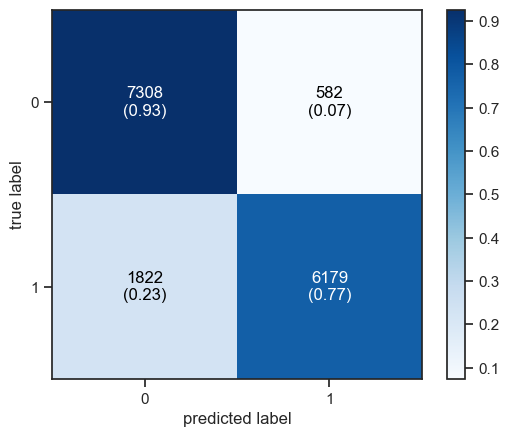

In [455]:
print('Matriz de confusion LGBMClassifier')

cm1 = confusion_matrix(y_test,y_est2)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 93% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 23% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 7% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 77% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

In [460]:
def plot_roc_curve(fpr, tpr, roc_auc):  
    plt.plot(fpr, tpr, color='orange', label='ROC curve of class (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Base estimator')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('(ROC) Curve')
    plt.legend()
    plt.show()

AUC:  0.849257103318359


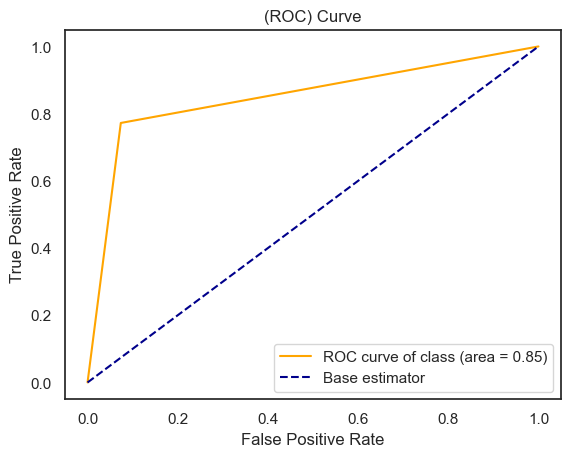

In [456]:
fpr, tpr, thresholds = roc_curve(y_test, y_est2)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

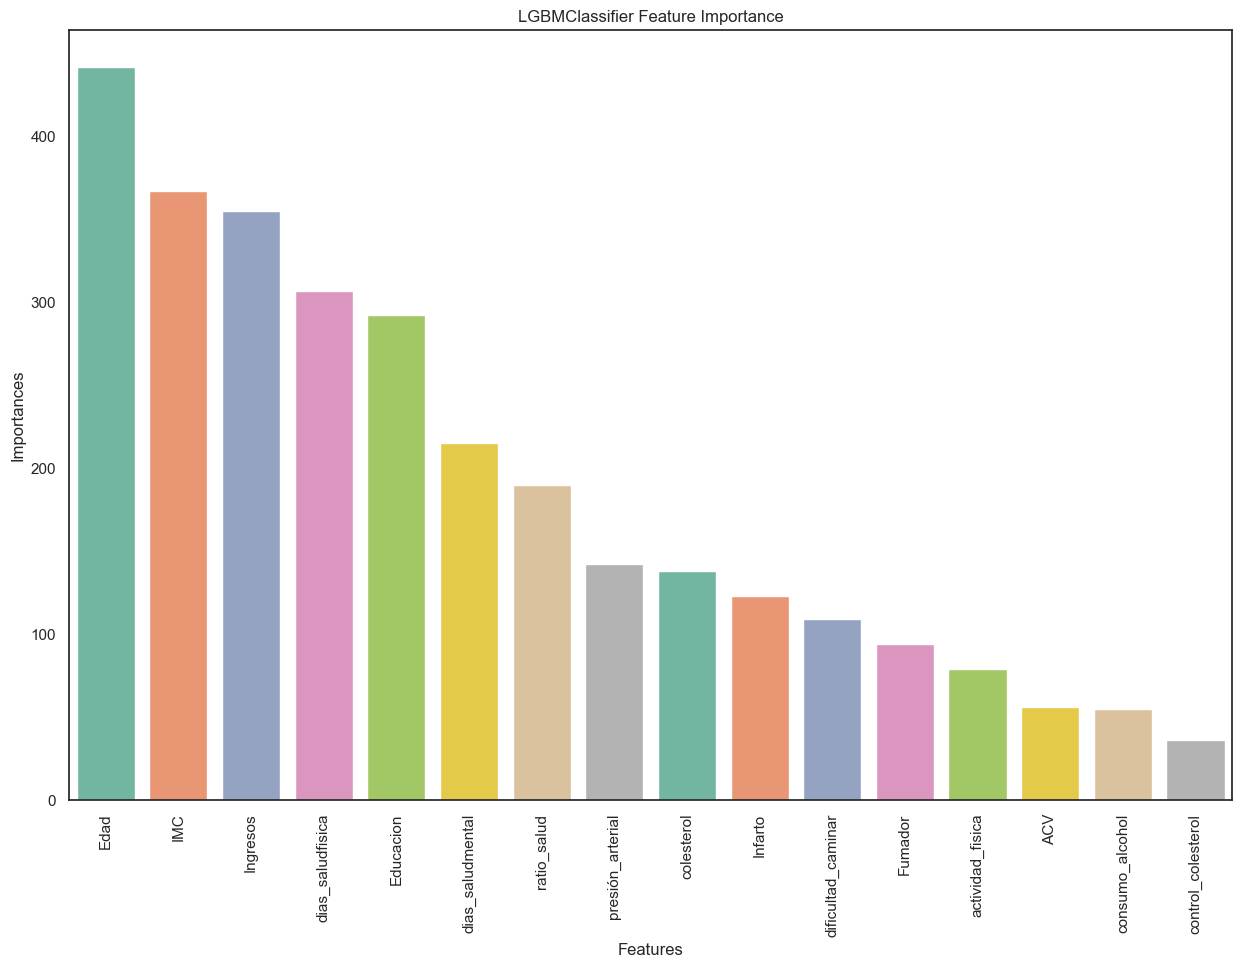

In [457]:
importances_LG = LG1.feature_importances_
columns = X1.columns
df_LG = pd.DataFrame({'Features': columns, 'Importances': importances_LG})
df_LG = df_LG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_LG, palette='Set2')
plt.title('LGBMClassifier Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [463]:
joblib.dump(LG1, 'diabetes_LG_model.joblib')

['diabetes_LG_model.joblib']

## Random Forest Classifier

In [417]:
# Aplico tuning de hyperparametros del modelo
RF = RandomForestClassifier(random_state = 42)

# Defino Randomized search
param_distributions_RF = { 
    
    'n_estimators' :[50, 75, 100, 125, 150,200,250], 
    'max_features': [ 'sqrt', 'log2'], 
    'max_depth' : [1,2,3,4,5,None],
    'criterion' :['gini', 'entropy'],
    'ccp_alpha': [0.0, 0.01, 0.02,0.03],
    'min_samples_split':[2,3,4,5,6,7]
    
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
RF_RS = RandomizedSearchCV(
       estimator  = RF,
       param_distributions = param_distributions_RF,
       scoring    = 'recall', 
       cv         = cv, 
       return_train_score = True,
       n_jobs  = -1,
       n_iter=50
       )


In [418]:
# Entrenar
RF_RS_result = RF_RS.fit(X_train, y_train)
# Sumarizo resultados
print("Best: %f using %s" % (RF_RS_result.best_score_, RF_RS_result.best_params_))

Best: 0.722910 using {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.01}


In [419]:
# Obtener los mejores hiperparámetros de randomized search
best_params_RF = RF_RS_result.best_params_

In [420]:
best_params_RF

{'n_estimators': 200,
 'min_samples_split': 2,
 'max_features': 'log2',
 'max_depth': None,
 'criterion': 'gini',
 'ccp_alpha': 0.01}

In [421]:
# Defino Grid search
params_RF = {'n_estimators': [best_params_RF['n_estimators'] - 50, best_params_RF['n_estimators'], best_params_RF['n_estimators'] + 50,
                             best_params_RF['n_estimators'] + 25,best_params_RF['n_estimators'] -25],
            'min_samples_split': [best_params_RF['min_samples_split'] - 1, best_params_RF['min_samples_split'], best_params_RF['min_samples_split'] + 1],
            'ccp_alpha': [best_params_RF['ccp_alpha'] - 0.1, best_params_RF['ccp_alpha'], best_params_RF['ccp_alpha'] + 0.1]
            
            }

RF_GS = GridSearchCV(    
       estimator  = RF,
       param_grid = params_RF,
       scoring    = 'recall', 
       cv         = 5, 
       return_train_score = True,
       n_jobs  = -1
       )

In [422]:
# Entrenar
RF_GS_result = RF_GS.fit(X_train, y_train)
# Sumarizo resultados
print("Best: %f using %s" % (RF_GS_result.best_score_, RF_GS_result.best_params_))

Best: 0.722301 using {'ccp_alpha': 0.01, 'min_samples_split': 3, 'n_estimators': 150}


In [423]:
#Aplicamos los parametros obtenidos 
RF1 = RandomForestClassifier( n_jobs  = -1, random_state = 42,  n_estimators = 150, min_samples_split = 3 ,
                             max_features =  'log2',max_depth =  None, criterion = 'gini', ccp_alpha = 0.01)

# Entrenar
RF1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de testeo
y_est4 = RF1.predict(X_test) 

# Obtener las predicciones para el conjunto de datos de train
y_est6 = RF1.predict(X_train) 

In [424]:
# Obtener las metricas
accuracy_RF_test = accuracy_score(y_test,y_est4)
recall_RF_test = recall_score(y_test, y_est4)
precision_RF_test= precision_score(y_test, y_est4)
f1_RF_test = f1_score(y_test, y_est4)
Roc_auc_test_RF = roc_auc_score(y_test, y_est4)

MSE_RF_train = mean_squared_error(y_train, y_est6)
accuracy_RF_train = accuracy_score(y_train,y_est6)
recall_RF_train = recall_score(y_train, y_est6)
precision_RF_train =  precision_score(y_train, y_est6)
f1_RF_train = f1_score(y_train, y_est6)
Roc_auc_train_RF =  roc_auc_score(y_train, y_est6)

In [425]:
# Imprimimos las metricas
vals2 = data=["Modelo 2: Random Forest ", accuracy_RF_train,accuracy_RF_test, precision_RF_train,precision_RF_test,
              recall_RF_train,recall_RF_test,f1_RF_train,f1_RF_test, Roc_auc_train_RF , Roc_auc_test_RF ] 
cols2 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_RF = pd.DataFrame([vals2], columns=cols2)

In [426]:
round(df_metrics_RF,3) 

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 2: Random Forest,0.812,0.806,0.88,0.88,0.722,0.712,0.793,0.787,0.812,0.807


Matriz de confusion Random Forest


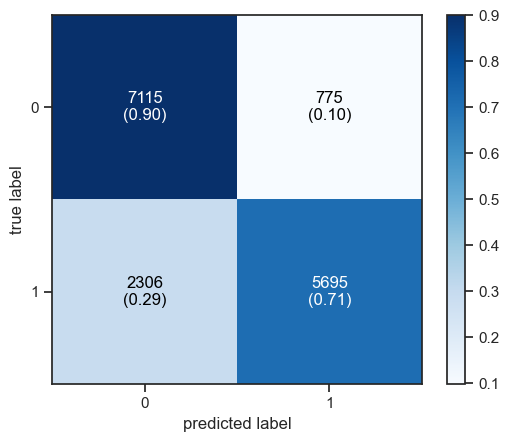

In [458]:
print('Matriz de confusion Random Forest')

cm1 = confusion_matrix(y_test,y_est4)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 90% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 29% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 10% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 71% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

AUC:  0.8067802123593866


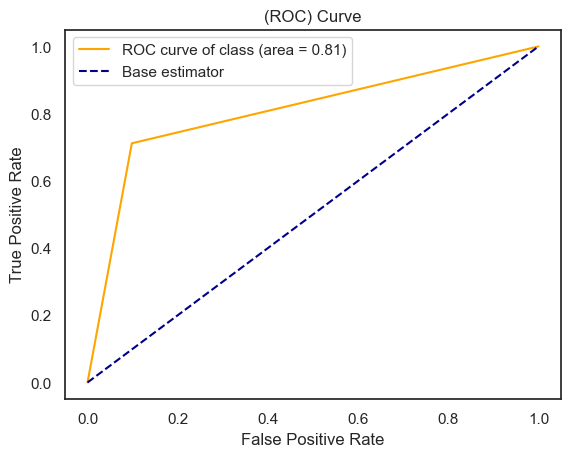

In [459]:
fpr, tpr, thresholds = roc_curve(y_test, y_est4)
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

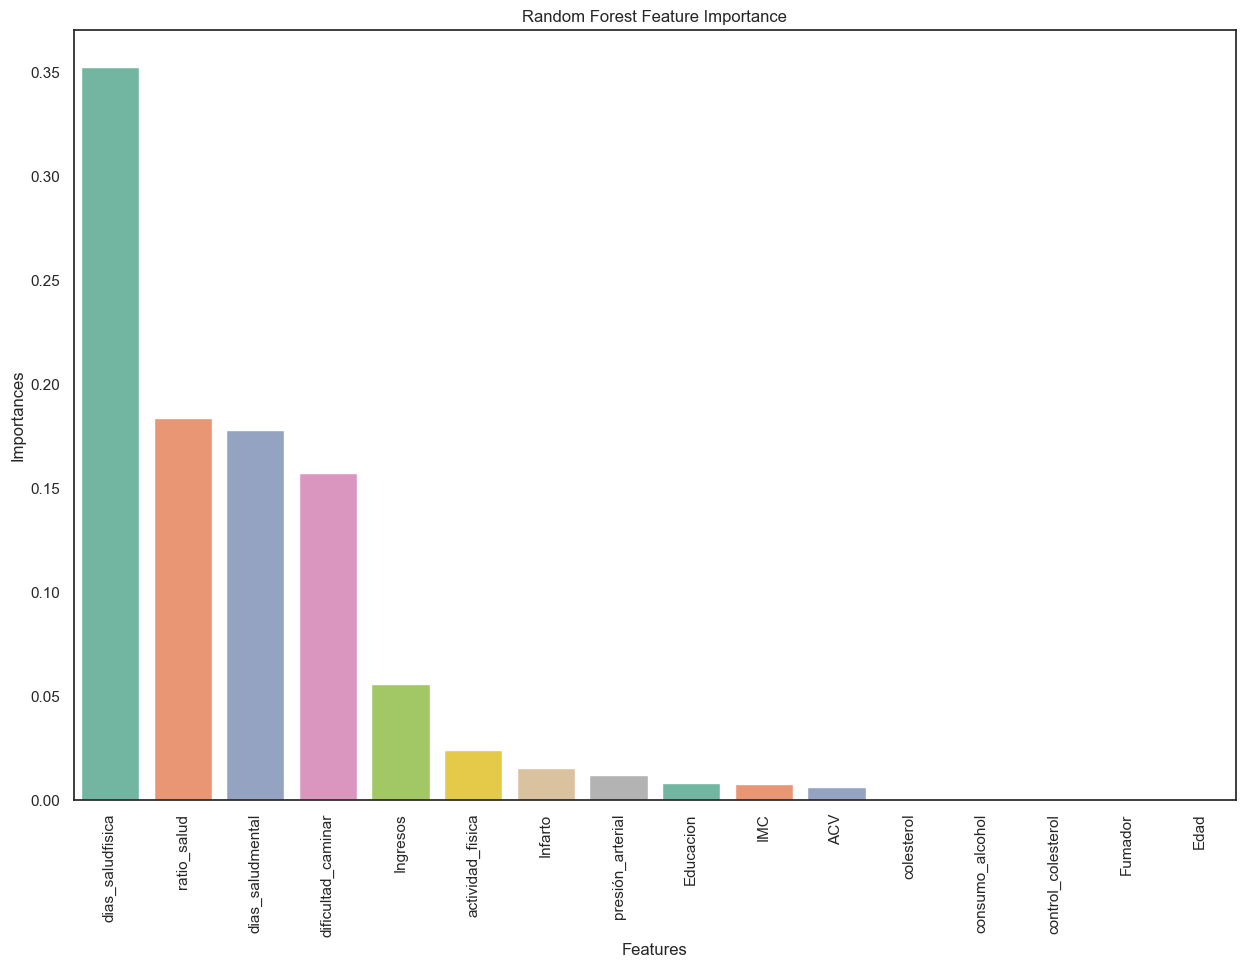

In [461]:
importances_RF = RF1.feature_importances_
columns = X1.columns
df_RF = pd.DataFrame({'Features': columns, 'Importances': importances_RF})
df_RF = df_RF.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_RF, palette='Set2')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [462]:
joblib.dump(RF1, 'diabetes_RF_model.joblib')

['diabetes_RF_model.joblib']

# XGBOOST

**Optimización bayesiana con HYPEROPT**

Utilizaremos la Optimización bayesiana con HYPEROPT para evaluar sus resultados en el algoritmo Xgboost 

Hyperopt es una libreria de Python que se utiliza para ajustar los hiperparámetros del modelo, la cual busca a través de un espacio de valores de hiperparámetros y encuentra los mejores valores posibles que producen el mínimo de la función de pérdida.



In [225]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials


In [246]:
#Inicializar espacio de dominio para rango de valores, 
#El espacio de dominio son los valores de entrada sobre los que queremos buscar.
space={ 
        'n_estimators': 180,
        'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'eta': hp.quniform('eta', 0.05, 1, 0.025),
        'seed': 42
    }

In [249]:
# Definir función objetivo
def objective(space):
    clf=xgb.XGBClassifier(objective = 'binary:logistic', 
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_lambda = space['reg_lambda'],min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=space['colsample_bytree'],eta = space['eta'])
                    
    
    evaluation = [( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    y_pred = clf.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print ("SCORE:", recall)
    return {'loss': -recall, 'status': STATUS_OK }

In [250]:
trials = Trials()
best = fmin(fn=objective,space=space, max_evals=100, algo=tpe.suggest,trials = trials)
print(best)


SCORE:                                                 
0.7687789026371703                                     
SCORE:                                                                            
0.7699037620297463                                                                
SCORE:                                                                            
0.7682789651293588                                                                
SCORE:                                                                            
0.7681539807524059                                                                
SCORE:                                                                            
0.7707786526684165                                                                
SCORE:                                                                            
0.7709036370453693                                                                
SCORE:                                                    

In [256]:
#ENTRENAMIENTO CON LOS MEJORES HIPERPARAMETROS
model_xgb = xgb.XGBClassifier(seed = 42, objective = 'binary:logistic', eval_metric =  'auc', 
                    n_estimators = 180, max_depth = 3, gamma = 7,
                    reg_lambda = 0.16,min_child_weight=1 ,
                    colsample_bytree = 0.6,eta = 1)
              
# Entrenar
model_xgb.fit(X_train, y_train)

# Obtener las predicciones para el conjunto de datos de testeo
y_est8 = model_xgb.predict(X_test)

# Obtener las predicciones para el conjunto de datos de train
y_est9 = model_xgb.predict(X_train) 

In [257]:
# Obtener las metricas
accuracy_XG1_test = accuracy_score(y_test,y_est8)
recall_XG1_test = recall_score(y_test, y_est8)
precision_XG1_test= precision_score(y_test, y_est8)
f1_XG1_test = f1_score(y_test, y_est8)
Roc_auc_test_XG1 = roc_auc_score(y_test, y_est8)      

MSE_XG1_train = mean_squared_error(y_train, y_est9)
accuracy_XG1_train = accuracy_score(y_train,y_est9)
recall_XG1_train = recall_score(y_train, y_est9)
precision_XG1_train =  precision_score(y_train, y_est9)
f1_XG1_train = f1_score(y_train, y_est9)
Roc_auc_train_XG1 =  roc_auc_score(y_train, y_est9)

In [258]:
# Imprimimos las metricas
vals4 = data=["Modelo 3: XGBOOST - HYPEROPT ", accuracy_XG1_train,accuracy_XG1_test, precision_XG1_train,precision_XG1_test,
              recall_XG1_train,recall_XG1_test,f1_XG1_train,f1_XG1_test, Roc_auc_train_XG1 , Roc_auc_test_XG1 ] 
cols4 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_GB_HYPEROPT = pd.DataFrame([vals4], columns=cols4)

In [259]:
round(df_metrics_GB_HYPEROPT,3)  

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 3: XGBOOST,0.852,0.845,0.908,0.906,0.782,0.772,0.84,0.834,0.852,0.845


Matriz de confusion  XGBOOST - HYPEROPT 


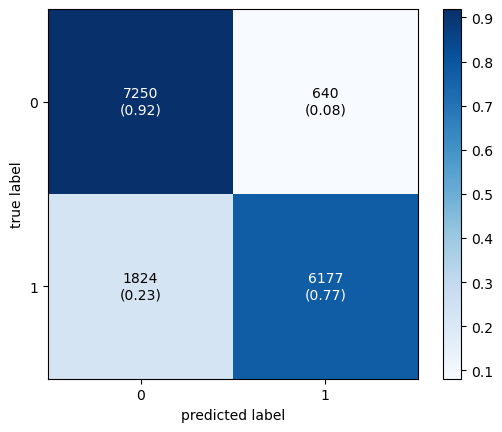

In [263]:
print('Matriz de confusion  XGBOOST - HYPEROPT ')

cm1 = confusion_matrix(y_test,y_est8)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 92% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 23% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 8% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 77% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

AUC:  0.8454565802848788


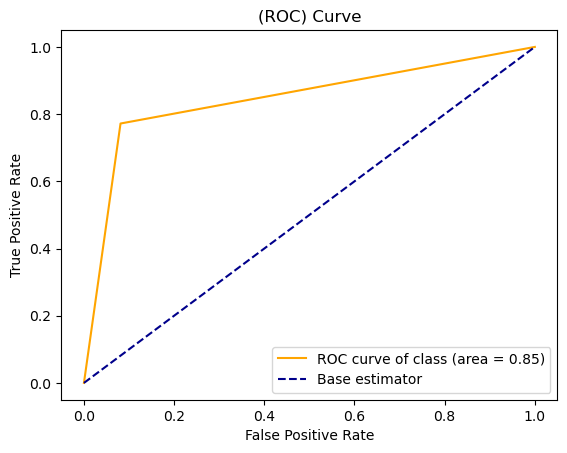

In [264]:
fpr, tpr, thresholds = roc_curve(y_test,y_est8 )
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

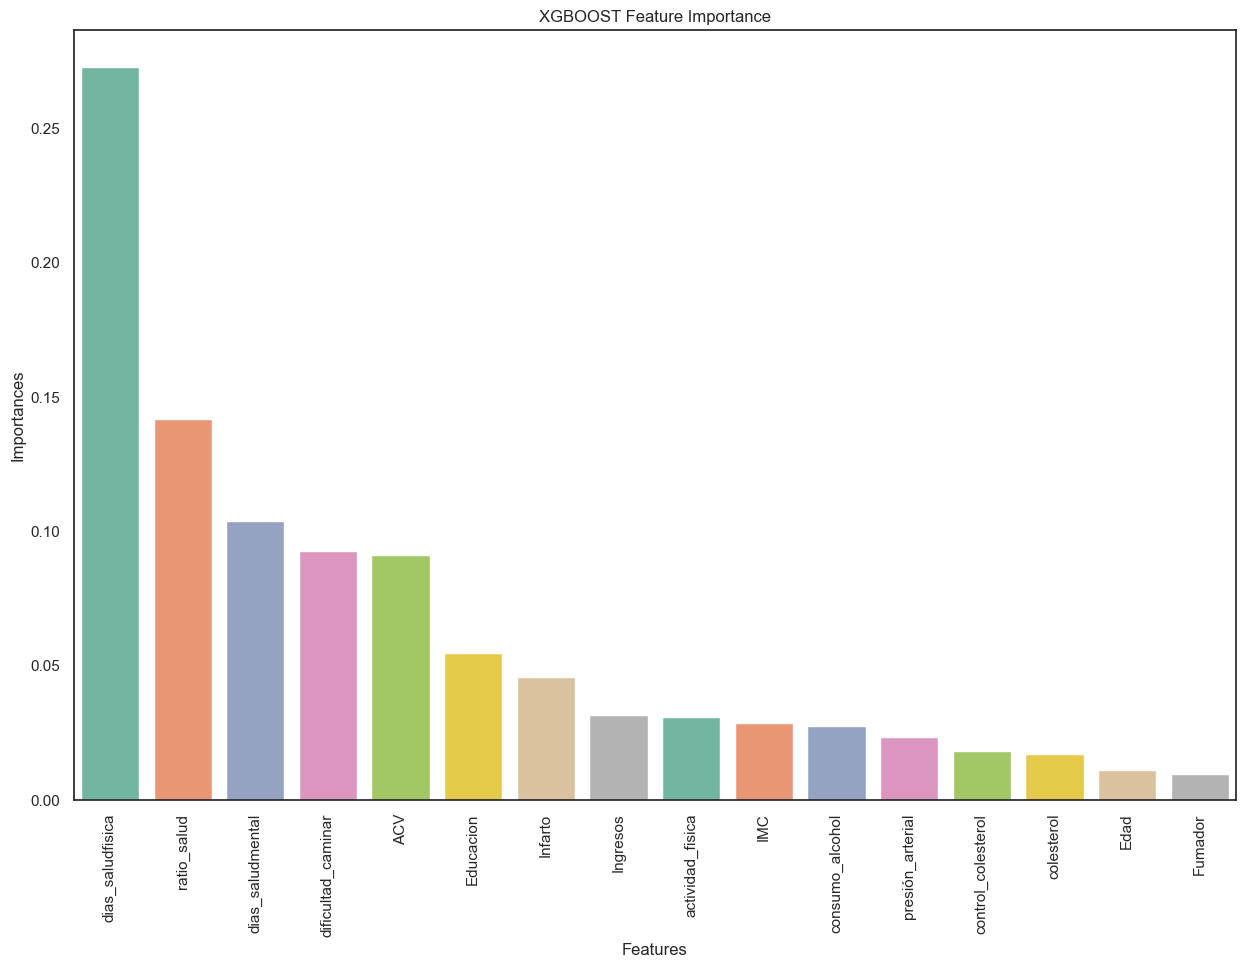

In [465]:
importances_XG = model_xgb.feature_importances_
columns = X1.columns
df_XG = pd.DataFrame({'Features': columns, 'Importances': importances_XG})
df_XG = df_XG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_XG, palette='Set2')
plt.title('XGBOOST Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [466]:
joblib.dump(model_xgb, 'diabetes_XG_model.joblib')

['diabetes_XG_model.joblib']

## GradientBoosting

In [343]:
# scikit-optimize (skopt) libreria 
from skopt.space import Real, Integer, Categorical
from skopt import gp_minimize
from skopt.utils import use_named_args


gp_minimize es una función poderosa proporcionada por la biblioteca scikit-optimize que nos permite optimizar de manera eficiente los hiperparámetros de los modelos de aprendizaje automático mediante la optimización bayesiana con procesos gaussianos para minimizar una función objetivo. Nos ayuda a encontrar el mejor conjunto de hiperparámetros para nuestro modelo mientras minimiza la cantidad de evaluaciones necesarias, lo que puede ahorrar una cantidad significativa de tiempo y recursos.

In [348]:
gra = GradientBoostingClassifier(random_state = 42)

In [349]:
# lista de hiperparámetros que queremos optimizar
space  = [Integer(1, 5, name='max_depth'),
          Real(0.01, 1.0, "log-uniform", name='learning_rate'),
          Integer(2, 100, name='n_estimators'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    gra.set_params(**params)

    return -np.mean(cross_val_score(gra, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="recall"))

In [350]:
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

"Best score=%.4f" % res_gp.fun

'Best score=-0.7838'

In [352]:
print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- n_estimators=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best parameters:
- max_depth=3
- learning_rate=0.285895
- n_estimators=80
- min_samples_split=100
- min_samples_leaf=100


In [387]:
#Aplicamos los parametros obtenidos 
GB1 = GradientBoostingClassifier(random_state = 42, max_depth=3, n_estimators = 80, min_samples_split = 100,
                             min_samples_leaf=100,learning_rate=0.29 )

# Entrenar
GB1.fit(X_train, y_train)


# Obtener las predicciones para el conjunto de datos de testeo
y_est1 = GB1.predict(X_test) 

# Obtener las predicciones para el conjunto de datos de train
y_est3 = GB1.predict(X_train) 

In [388]:
# Obtener las metricas
accuracy_GB1_test = accuracy_score(y_test,y_est1)
recall_GB1_test = recall_score(y_test, y_est1)
precision_GB1_test= precision_score(y_test, y_est1)
f1_GB1_test = f1_score(y_test, y_est1)
Roc_auc_test_GB1 = roc_auc_score(y_test, y_est1)      

MSE_GB1_train = mean_squared_error(y_train, y_est3)
accuracy_GB1_train = accuracy_score(y_train,y_est3)
recall_GB1_train = recall_score(y_train, y_est3)
precision_GB1_train =  precision_score(y_train, y_est3)
f1_GB1_train = f1_score(y_train, y_est3)
Roc_auc_train_GB1 =  roc_auc_score(y_train, y_est3)

In [389]:
# Imprimimos las metricas
vals5 = data=["Modelo 4: GradientBoosting ", accuracy_GB1_train,accuracy_GB1_test, precision_GB1_train,precision_GB1_test,
              recall_GB1_train,recall_GB1_test,f1_GB1_train,f1_GB1_test, Roc_auc_train_GB1 , Roc_auc_test_GB1 ] 
cols5 = ["Modelo", "Accuracy_train","Accuracy_test", "Precision_train","Precision_test",
         "Recall_train","Recall_test", "f1 score_train","f1 score_test", "Roc_auc_train", "Roc_auc_test"]

df_metrics_GraB = pd.DataFrame([vals5], columns=cols5)

In [390]:
round(df_metrics_GraB,3)  

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 4: GradientBoosting,0.851,0.844,0.903,0.903,0.785,0.774,0.84,0.834,0.85,0.845


Matriz de confusion GradientBoosting


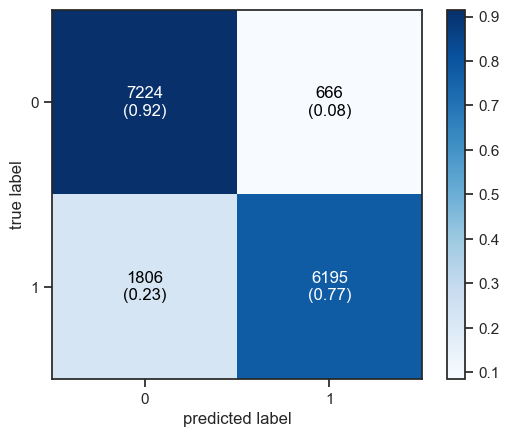

In [467]:
print('Matriz de confusion GradientBoosting')

cm1 = confusion_matrix(y_test,y_est1)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

- 92% de los casos, predijo que el encuestado no tiene diabetes y es cierto. (Verdadero Negativo)
- 23% de los casos predijo que el encuestado no tiene diabetes y si tiene. (Falsos Negativos)
- 8% de los casos predijo que el encuestado tiene diabetes y no tiene.(Falso positivo)
- 77% de los casos que los encuestados tienen diabetes predijo correctamente que tienen la enfermedad.(Verdaderos Positivos)

AUC:  0.8449337844176322


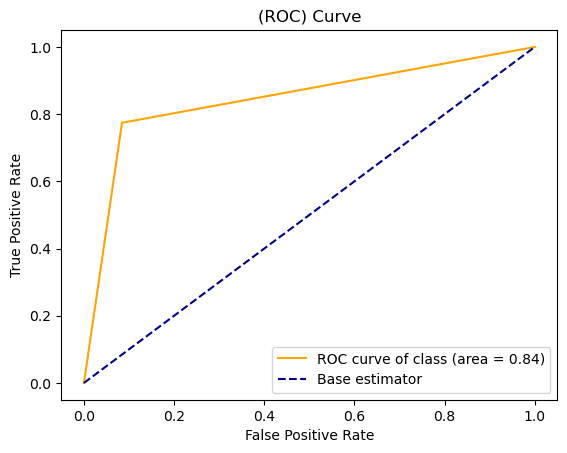

In [392]:
fpr, tpr, thresholds = roc_curve(y_test,y_est1 )
roc_auc = auc(fpr, tpr)

print("AUC: ", roc_auc)
plot_roc_curve(fpr, tpr, roc_auc)

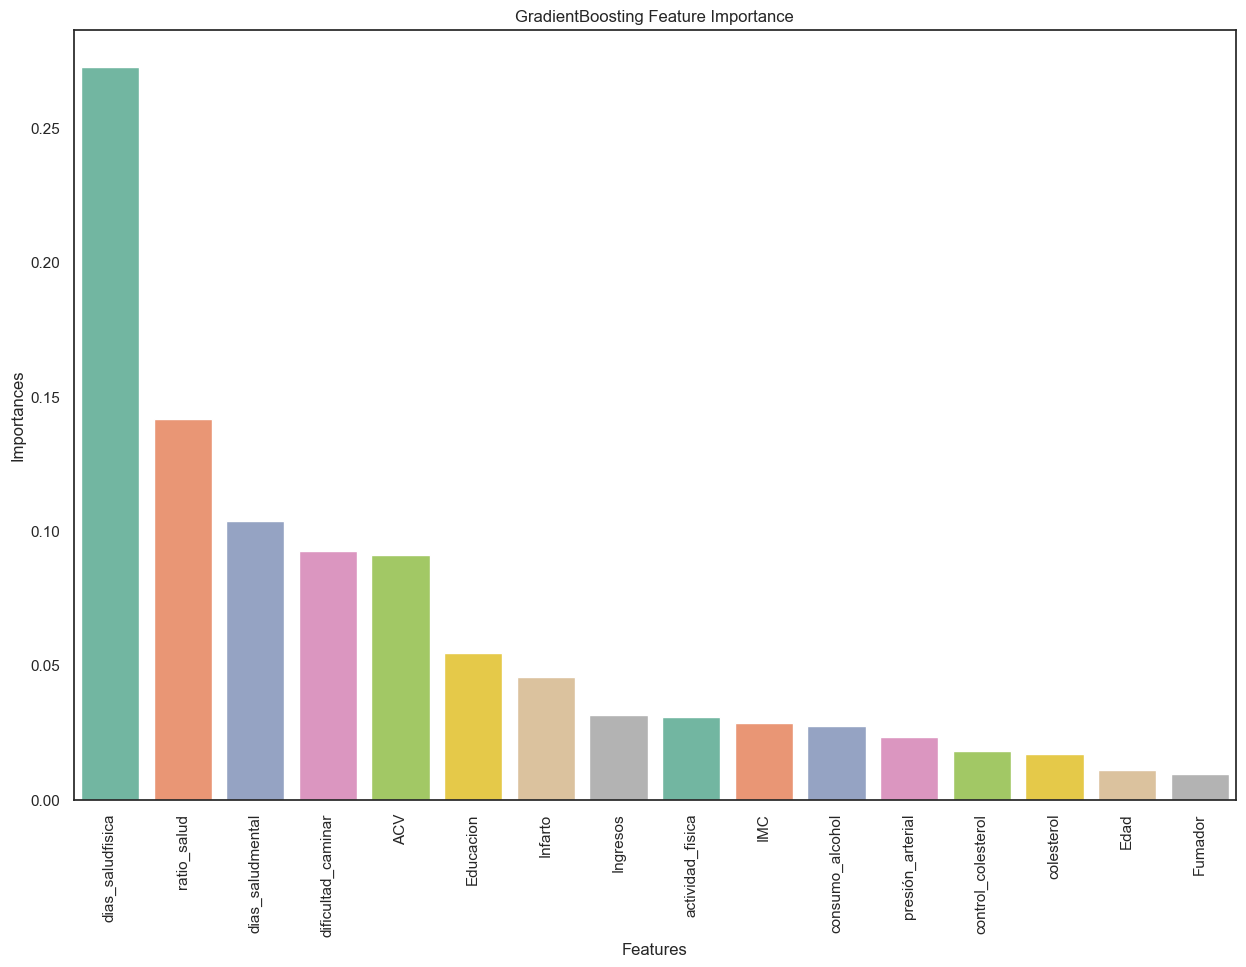

In [468]:
importances_GB = GB1.feature_importances_
columns = X1.columns
df_GB = pd.DataFrame({'Features': columns, 'Importances': importances_GB})
df_GB = df_XG.sort_values(by='Importances', ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x='Features', y='Importances', data=df_GB, palette='Set2')
plt.title('GradientBoosting Feature Importance')
plt.xticks(rotation=90)

plt.show()

In [469]:
joblib.dump(GB1, 'diabetes_GB_model.joblib')

['diabetes_GB_model.joblib']

## Comparando los resultados obtenidos

In [470]:
df_metrics = pd.concat([df_metrics_LG,df_metrics_RF,df_metrics_GB_HYPEROPT,df_metrics_GraB])

In [487]:
round(df_metrics.sort_values(by = ["Accuracy_test"]  ,ascending = False),2)

,Modelo,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,f1 score_train,f1 score_test,Roc_auc_train,Roc_auc_test
0,Modelo 1: LGBMClassifier,0.85,0.85,0.91,0.91,0.78,0.77,0.84,0.84,0.85,0.85
0,Modelo 3: XGBOOST,0.85,0.84,0.91,0.91,0.78,0.77,0.84,0.83,0.85,0.85
0,Modelo 4: GradientBoosting,0.85,0.84,0.90,0.90,0.78,0.77,0.84,0.83,0.85,0.84
0,Modelo 2: Random Forest,0.81,0.81,0.88,0.88,0.72,0.71,0.79,0.79,0.81,0.81


In [488]:
df_metrics_1 = df_metrics[["Modelo","Accuracy_test", "Precision_test","Recall_test","f1 score_test"]]

In [489]:
# hago un melt para poder hacer un gráfico de barras de cada métrica

df_melt = pd.melt(df_metrics_1, id_vars=['Modelo'], value_vars=["Accuracy_test", "Precision_test","Recall_test","f1 score_test"], 
                )

df_melt = df_melt.rename(columns={"variable": "Métrica", "value": "Valor"})

In [490]:
df_melt 

,Modelo,Métrica,Valor
0,Modelo 1: LGBMClassifier,Accuracy_test,0.848719
1,Modelo 2: Random Forest,Accuracy_test,0.806117
2,Modelo 3: XGBOOST,Accuracy_test,0.844944
3,Modelo 4: GradientBoosting,Accuracy_test,0.844440
4,Modelo 1: LGBMClassifier,Precision_test,0.913918
5,Modelo 2: Random Forest,Precision_test,0.880216
6,Modelo 3: XGBOOST,Precision_test,0.906117
7,Modelo 4: GradientBoosting,Precision_test,0.902930
8,Modelo 1: LGBMClassifier,Recall_test,0.772278
9,Modelo 2: Random Forest,Recall_test,0.711786


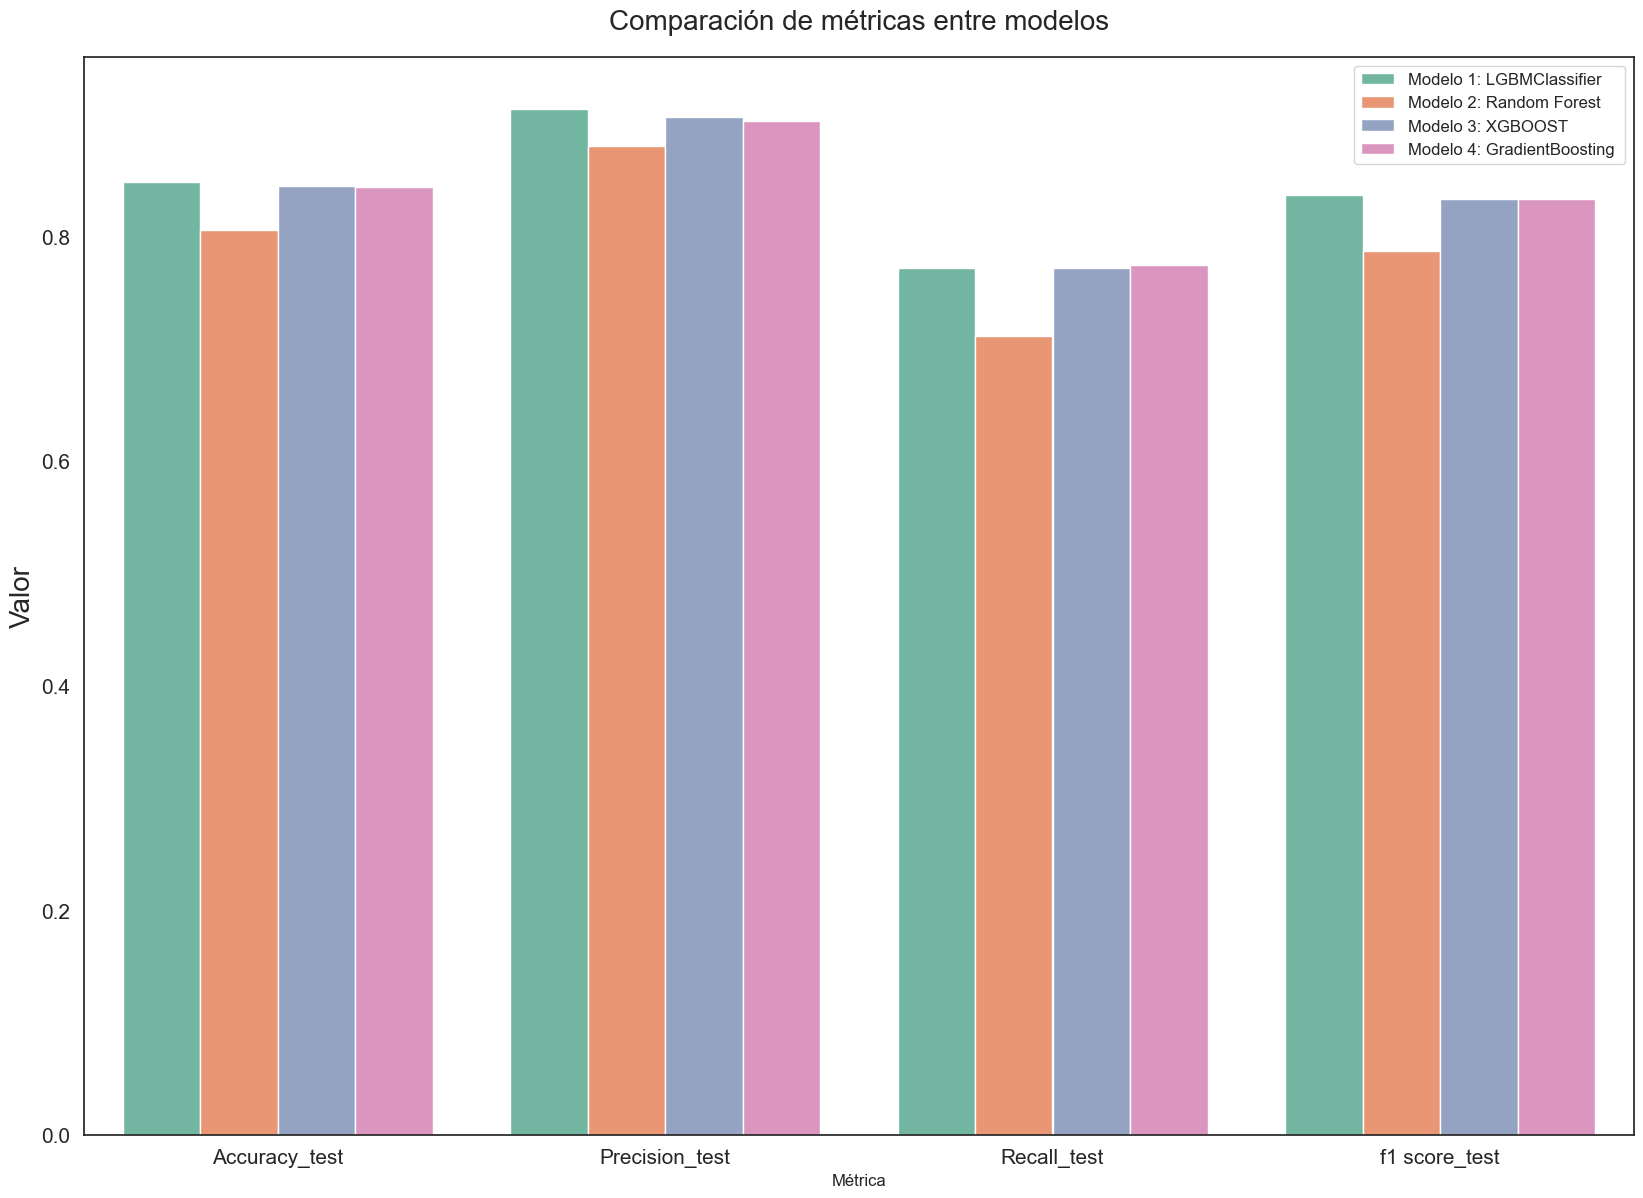

In [498]:
# hago un gráfico de barras comparativo de cada una de las métricas para cada modelo

fig_dims = (20, 14)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_melt, palette = "Set2")
ax.axes.set_title("Comparación de métricas entre modelos",fontsize=20, pad=20)
ax.set_ylabel("Valor",fontsize=20)
ax.tick_params(labelsize=15)
plt.legend(loc='upper right', fontsize='medium')

plt.show()

## Conclusiones



El conjunto de datos de indicadores de salud de la diabetes en Kaggle es un recurso interesante para explorar técnicas de aprendizaje automático en el campo de la salud. 
Al utilizar este tipo de datos, los investigadores y los profesionales de la salud pueden obtener información sobre los diversos factores que contribuyen al desarrollo y control de la diabetes. Con la ayuda de algoritmos de aprendizaje automático, es posible identificar patrones y predecir resultados que pueden ayudar en el diagnóstico temprano y la prevención de la enfermedad.

El dataset proporciona una descripción general de varios indicadores de salud, en mi opinión, las preguntas de esta encuesta no proporcionan atributos que permitan brindar predicciones precisas sobre si una persona tiene o no diabetes, ya que carece de indicadores fundamentales como puede ser la glucosa en sangre, sin embargo, podemos sacar conclusiones sobre qué factores influyen en mayor medida en las personas que hoy sufren la enfermedad y según estas características o atributos sugerir a las personas con mayores riesgos que realicen los estudios médicos necesarios que permitan confirmar o descartar la hipótesis. 


En este proyecto se han explorado técnicas de balanceo de datos y algoritmos de clasificación de aprendizaje automático con el objetivo de obtener un modelo predictivo con una recall minima del 75 % a partir de un dataset público. 
Se realizó una comparación entre todos los algoritmos entrenados, y se estableció que el algoritmo Xgboost,LGBMClassifier y   GradientBoosting obtuvieron la misma recall del 77% para los datos de test.

Analizando el resto de las metricas calculadas, el algoritmo que ofrece los mejores resultados para los datos de submuestreo dentro del contexto de predecir la enfermedad de diabetes es LGBMClassifier. 
Observamos tambien que LGBMClassifier demuestra una importancia de cada atributo acorde al analisis exploratorio de datos realizado. 